In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
#read data
df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [123]:
#Shape of the data
df.shape

(1460, 81)

In [124]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [126]:
for i in df.select_dtypes(include = "object").columns:
  print(df[i].value_counts())
  print("****"*10)

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
****************************************
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
****************************************
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
****************************************
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
****************************************
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
****************************************
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
****************************************
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
****************************************
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
****************************************
Neighborhood
NAmes      2

# Missing values Handling

In [127]:
# Set pandas to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Show number of missing values for all 81 features
print(df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [128]:
#Percentage of missing values in a column
(df.isnull().sum()/df.shape[0])*100
#RESULT Summary: Alley 93%, MasVnrType 59.7%, FireplaceQu 47%, PoolQC 99.5%, Fence 80%, MiscFeature 96%

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
Street,0.000000
Alley,93.767123
LotShape,0.000000
LandContour,0.000000
Utilities,0.000000


In [129]:
#Dropping columns with missing values > 50%
df = df.drop(['Alley','MasVnrType','PoolQC','FireplaceQu','Fence','MiscFeature'], axis=1)
#removed FireplaceQu also as it has an alternative called Fireplaces -> Number of fireplaces

In [130]:
#Dropping ID column
df = df.drop(['Id'], axis=1)

In [131]:
print(df.isnull().sum())
#RESULT Summary: LotFrontage 259, BsmtQual 37, BsmtCond 37, BsmtExposure 38, BsmtFinType1 37, BsmtFinType2 38, Electrical 1,
#                 GarageType 81, GarageYrBlt 81, GarageFinish 81, GarageQual 81, GarageCond 81

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath     

### =>Filling missing values of LotFrontage (Linear feet of street connected to property) with the median of correspondig neighborhood. As it could be more realistic than the overall median.

In [132]:
# Calculate the median LotFrontage for each neighborhood
neighborhood_medians = df.groupby('Neighborhood')['LotFrontage'].median()
print(neighborhood_medians)

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    65.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    91.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64


In [133]:
# Fill missing LotFrontage values with the neighborhood median
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

### =>Suspecting that the 81 null values of garage related columns are the same rows, so that could mean that these houses have no garage (NA)

In [134]:
# Checking if the same rows are missing across all Garage columns
garage_columns = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
missing_garage = df[garage_columns].isnull()

# Checking if all Garage columns are missing for the same rows
same_missing_rows = missing_garage.all(axis=1).sum()
print(f"Number of rows with missing values in all Garage columns: {same_missing_rows}")
#RESULT: all the missing values of garage related are same rows, not just randomized.
#So they are most likely has no garage, then they will be filled with NA

Number of rows with missing values in all Garage columns: 81


In [135]:
garage_columns = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df[garage_columns] = df[garage_columns].fillna('NA')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [136]:
# Suspecting the same with basement related features
basement_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

# Checking if the same rows are missing across all Basement columns
missing_basement = df[basement_columns].isnull()
same_missing_rows = missing_basement.all(axis=1).sum()
print(f"Number of rows with missing values in all Basement columns: {same_missing_rows}")

Number of rows with missing values in all Basement columns: 37


In [137]:
df[basement_columns] = df[basement_columns].fillna('NA')

In [138]:
#Removing the one row of null Electrical value
df = df.dropna(subset=['Electrical'])

In [139]:
print(df.isnull().sum())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

# Garbage Values Handling

In [140]:
for i in df.select_dtypes(include = "object").columns:
  print(df[i].value_counts())
  print("****"*10)
  #RESULT: No garbage values

MSZoning
RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
****************************************
Street
Pave    1453
Grvl       6
Name: count, dtype: int64
****************************************
LotShape
Reg    924
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
****************************************
LandContour
Lvl    1310
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
****************************************
Utilities
AllPub    1458
NoSeWa       1
Name: count, dtype: int64
****************************************
LotConfig
Inside     1051
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
****************************************
LandSlope
Gtl    1381
Mod      65
Sev      13
Name: count, dtype: int64
****************************************
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sa

# Duplicates check

In [141]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


# Exploratory Data Analysis (EDA)

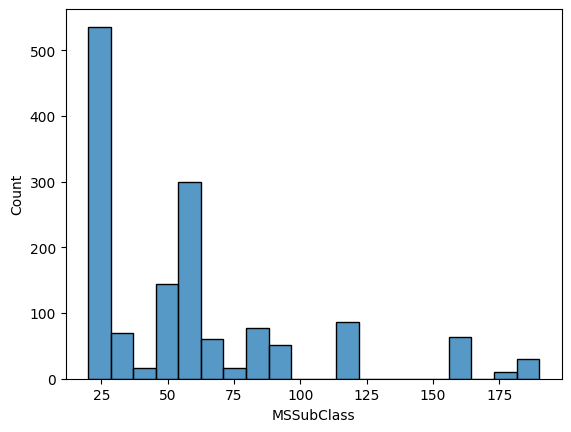

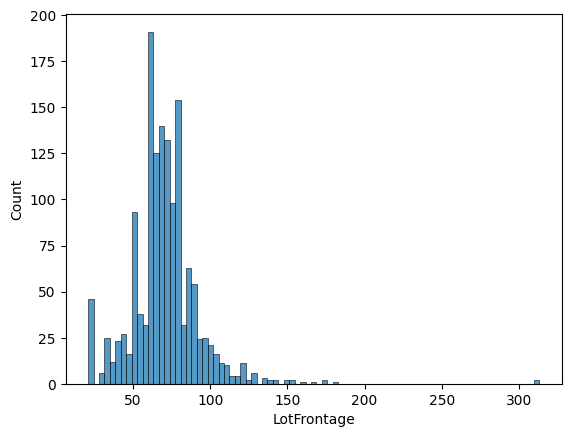

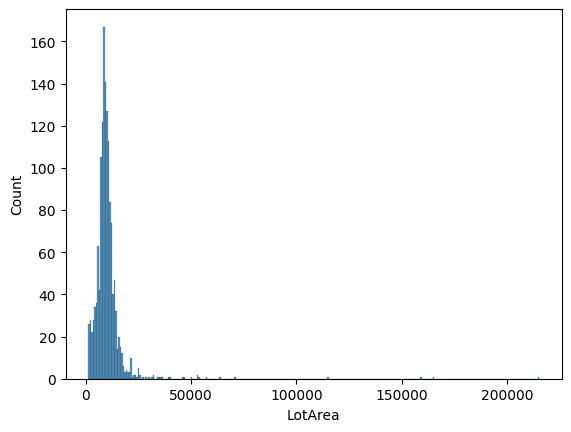

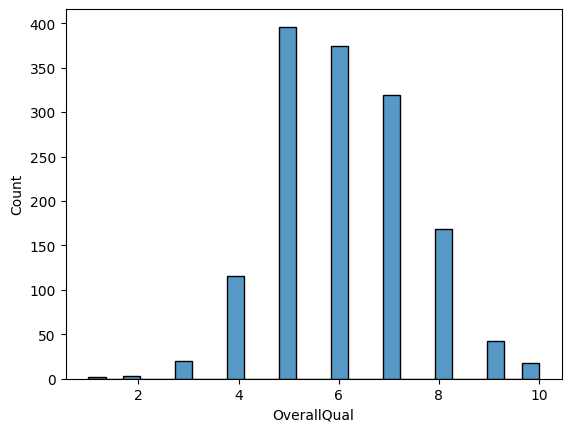

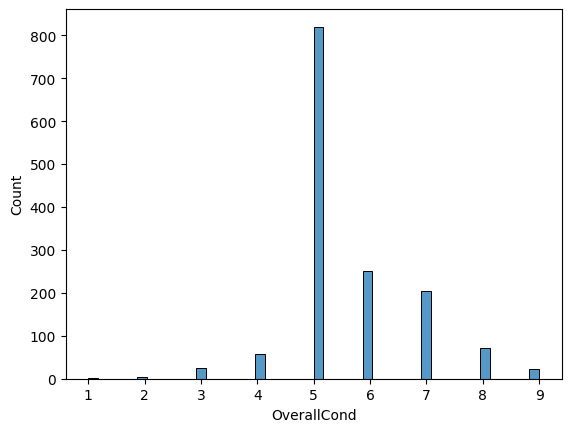

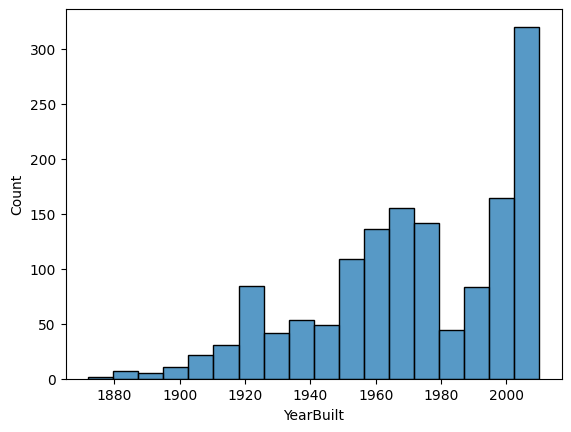

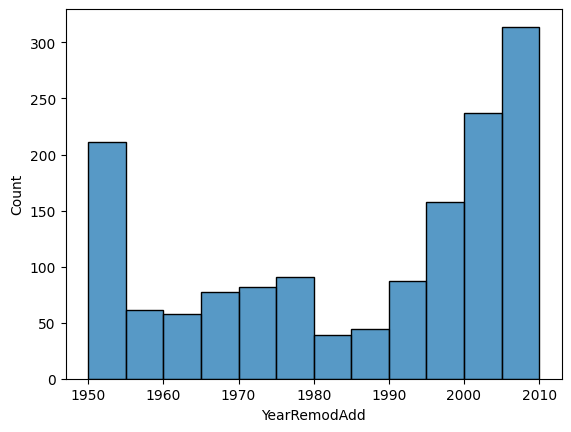

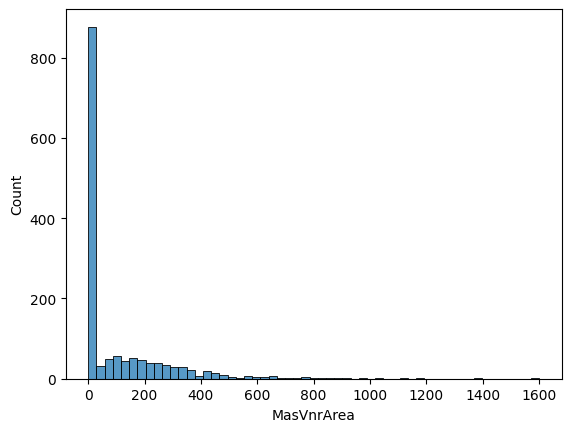

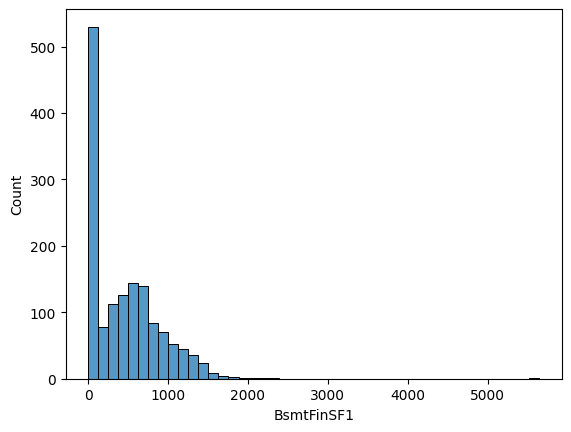

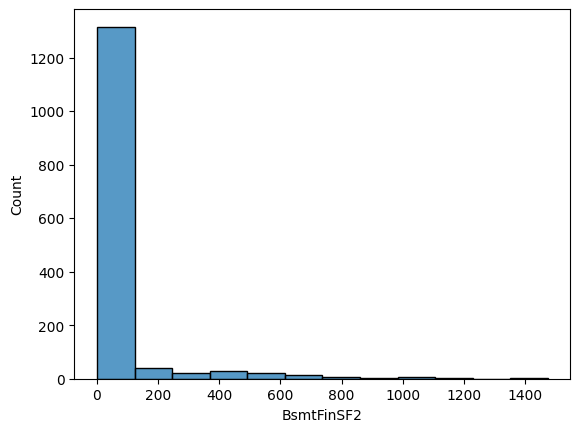

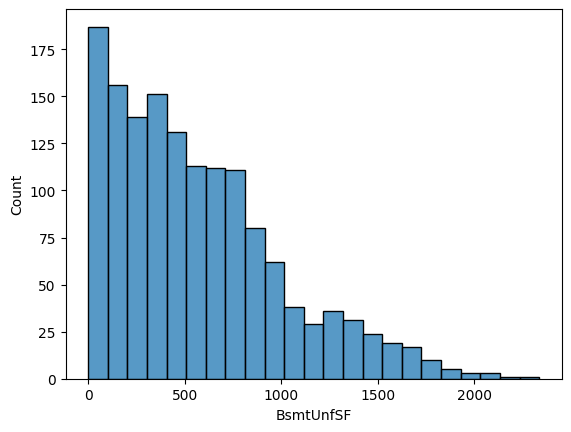

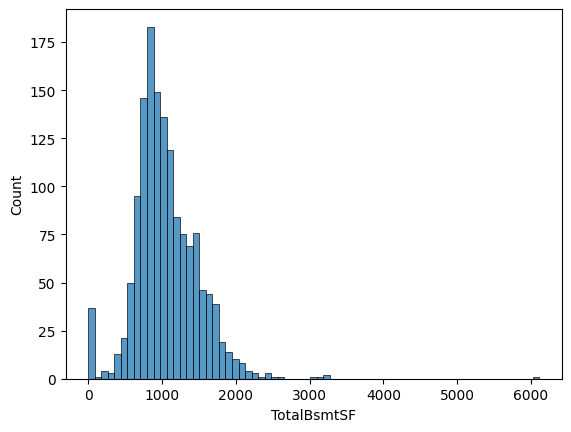

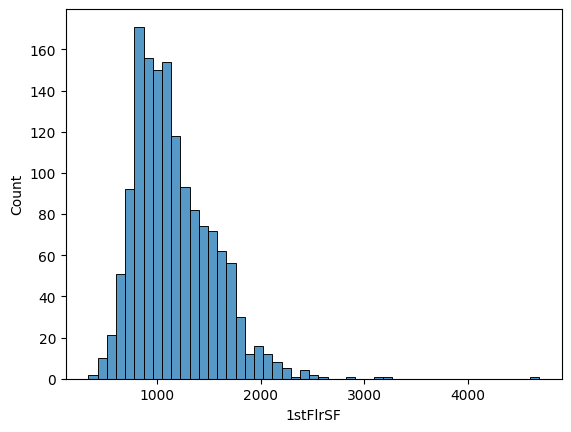

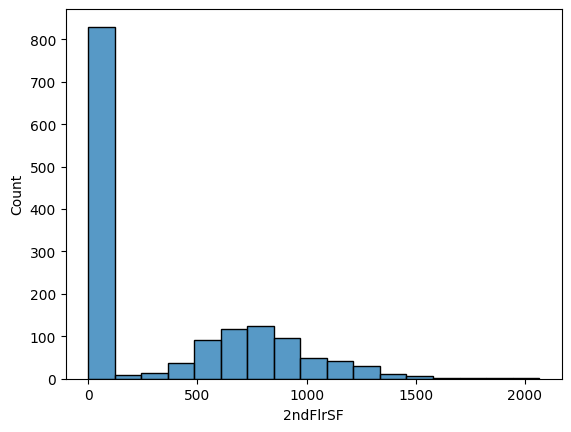

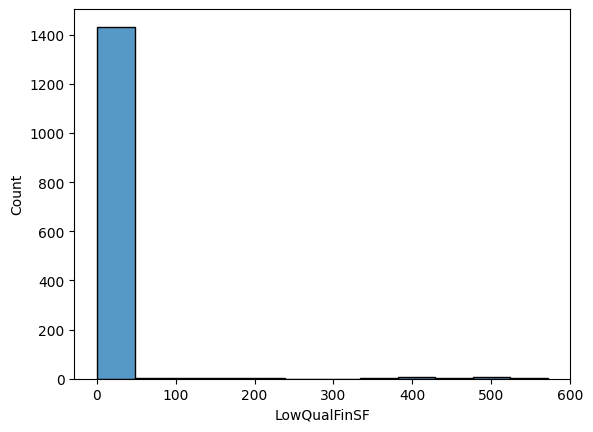

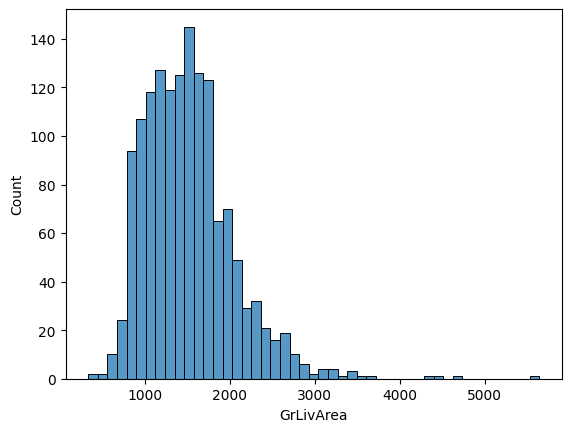

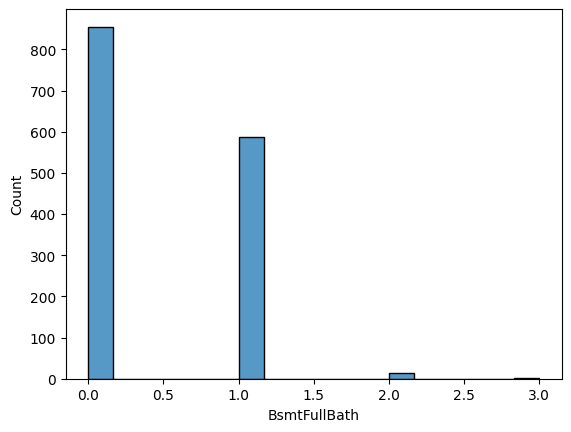

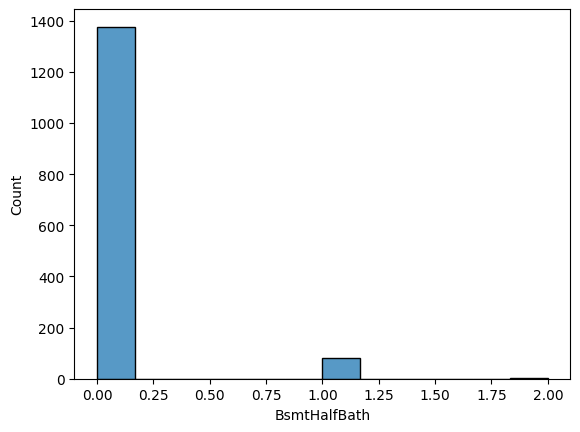

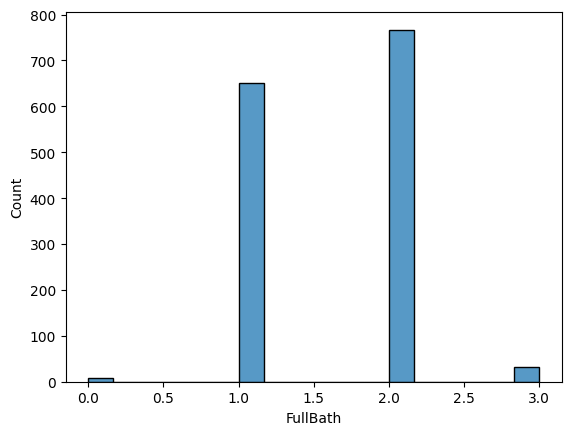

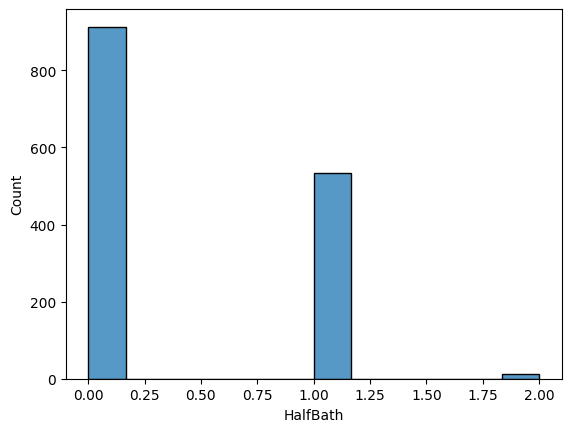

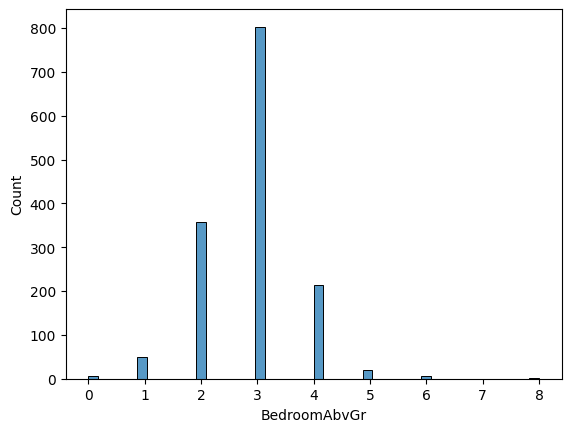

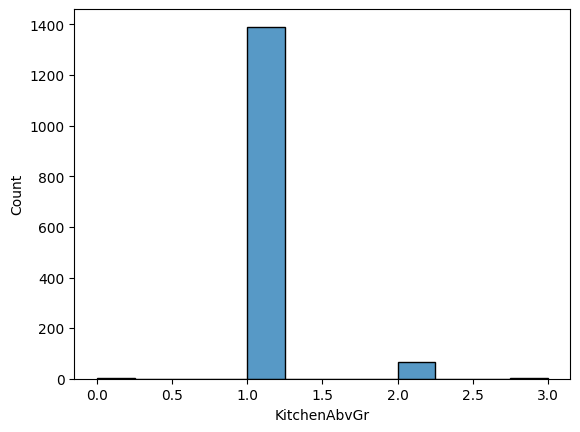

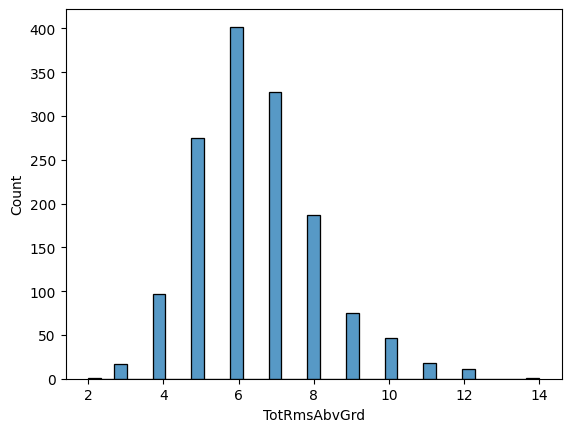

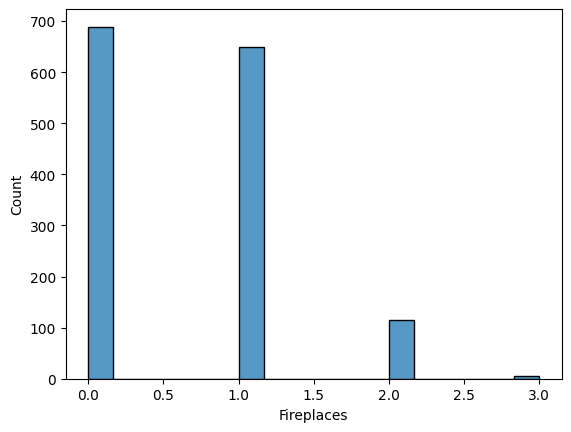

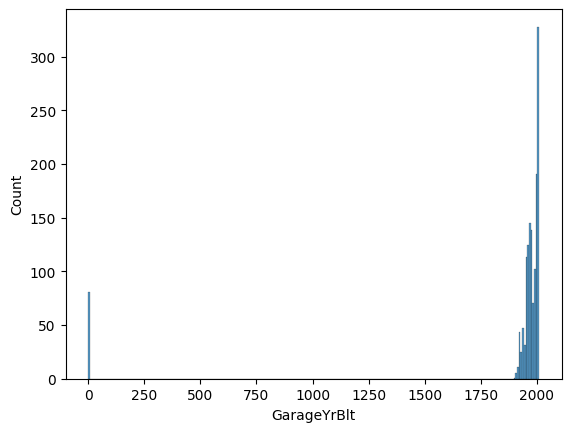

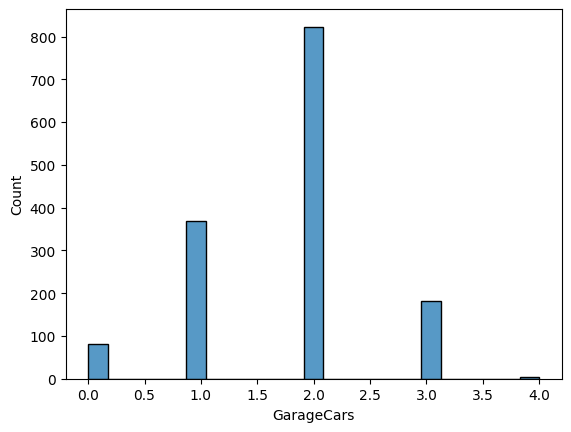

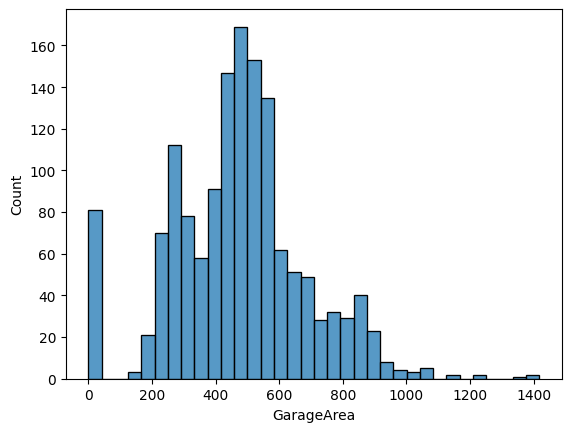

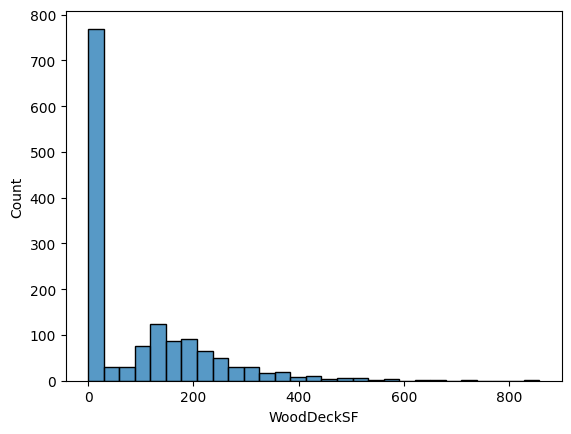

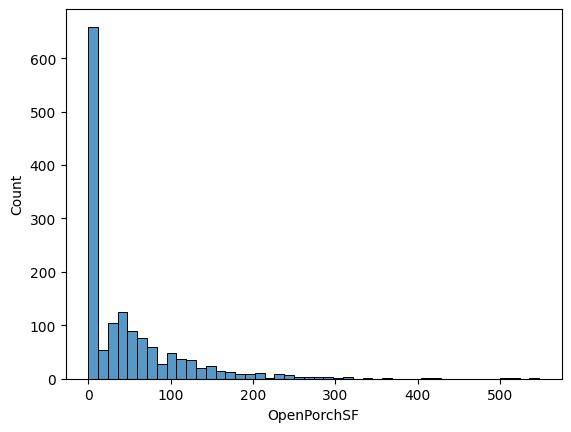

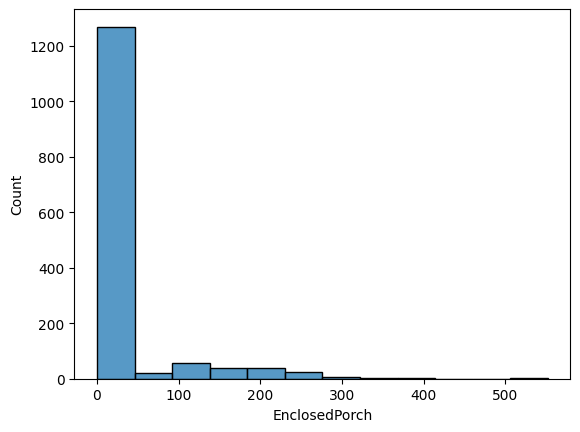

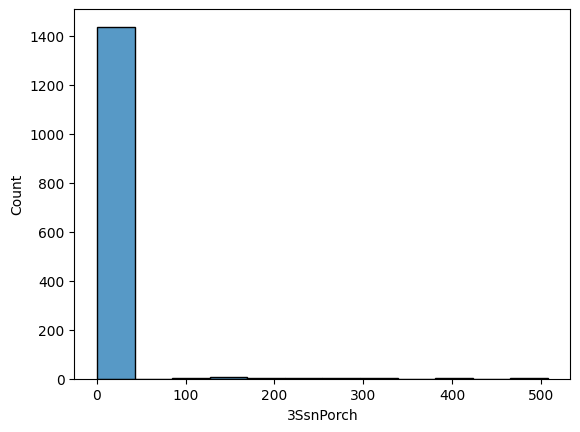

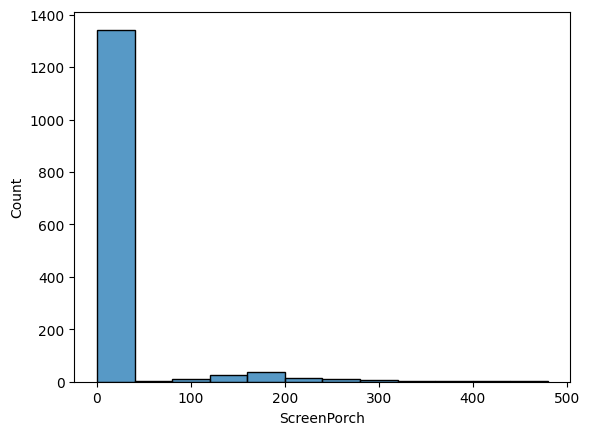

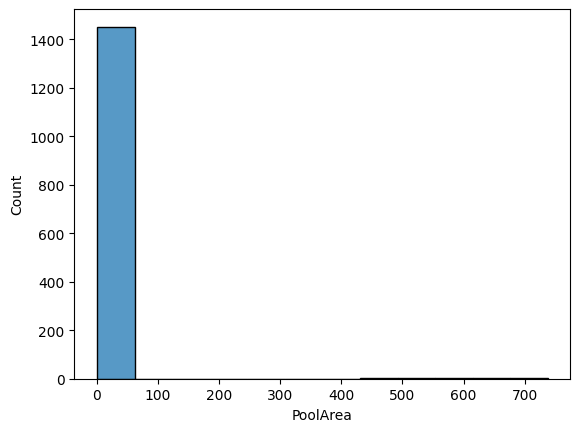

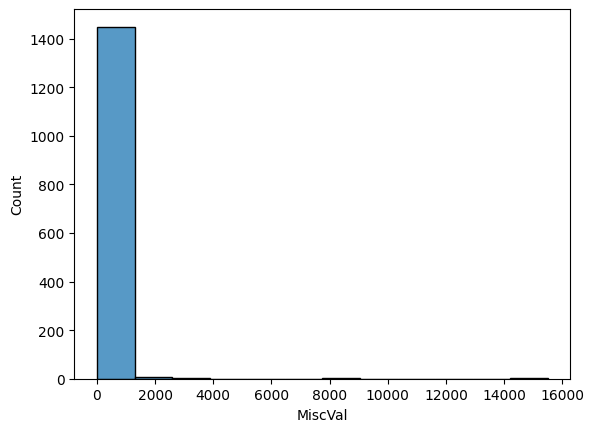

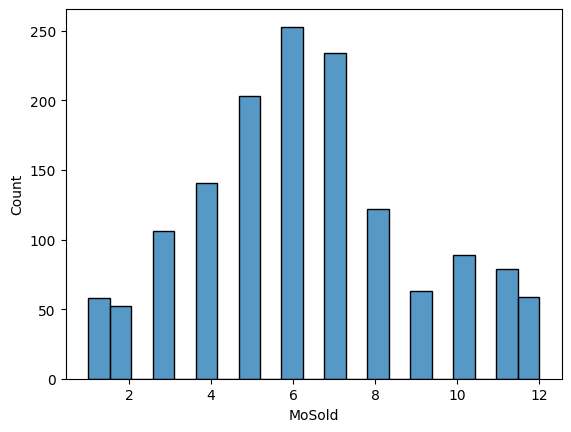

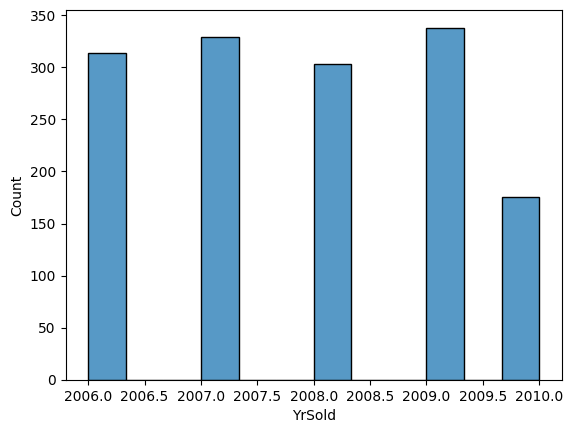

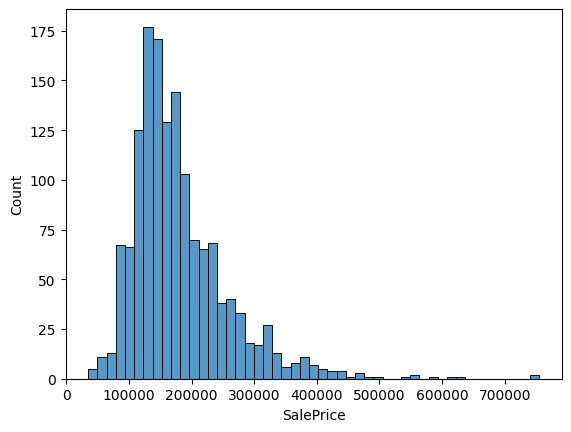

In [142]:
# histogram to understand data distribution

for i in df.select_dtypes(include= "number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

# Detecting Outliers

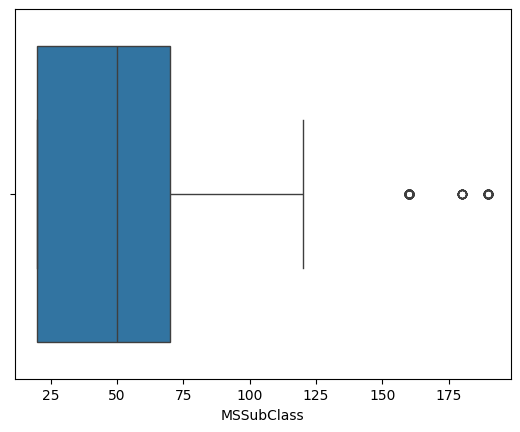

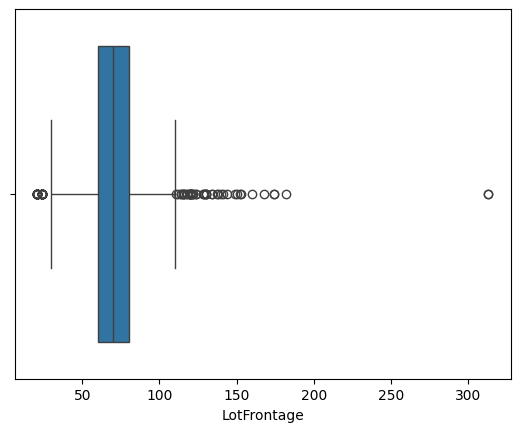

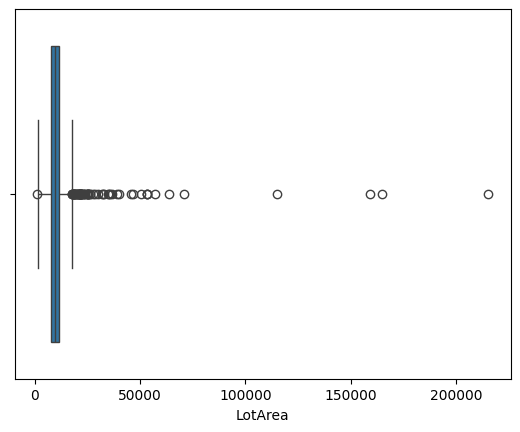

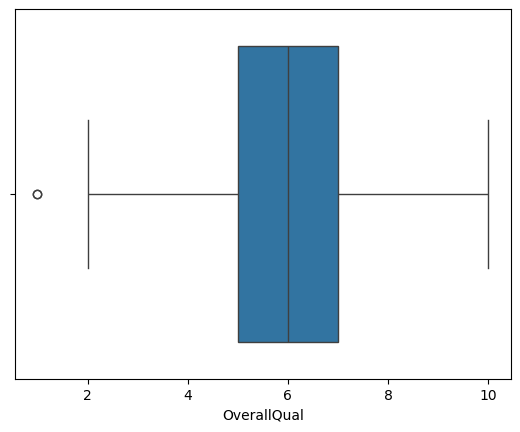

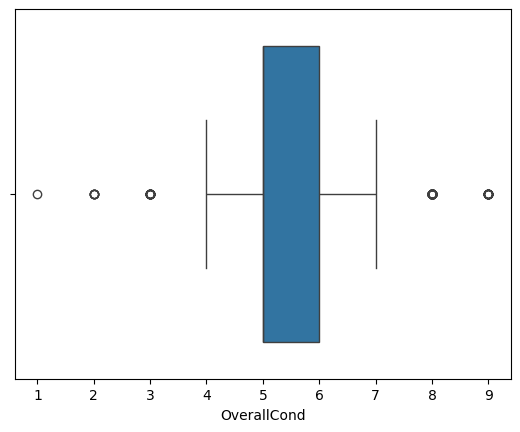

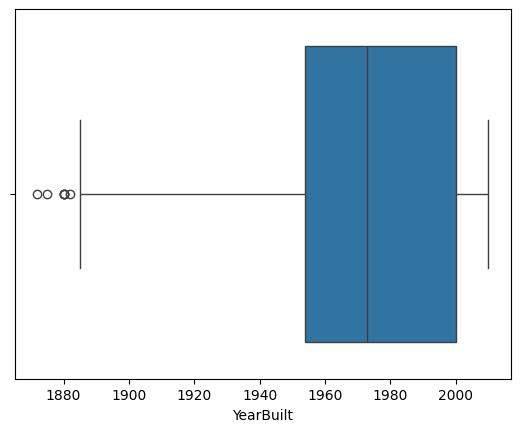

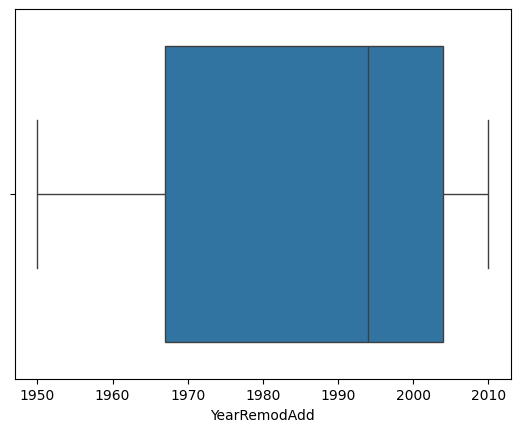

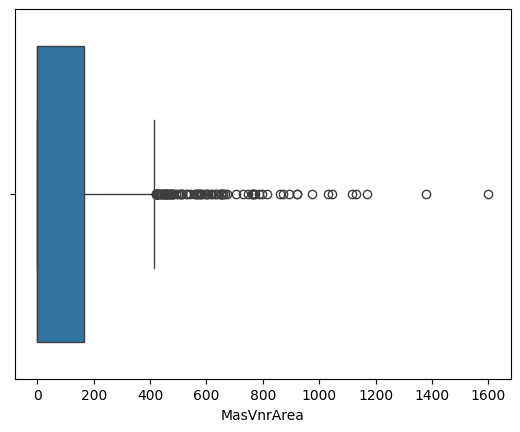

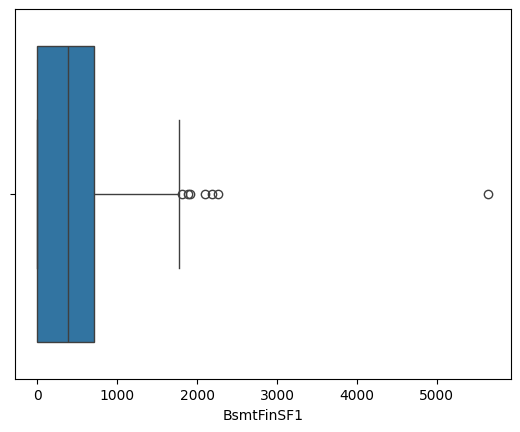

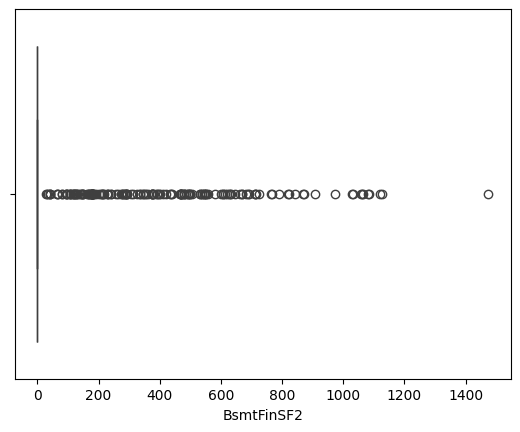

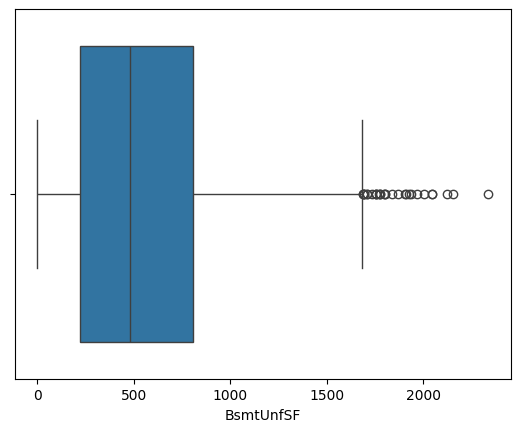

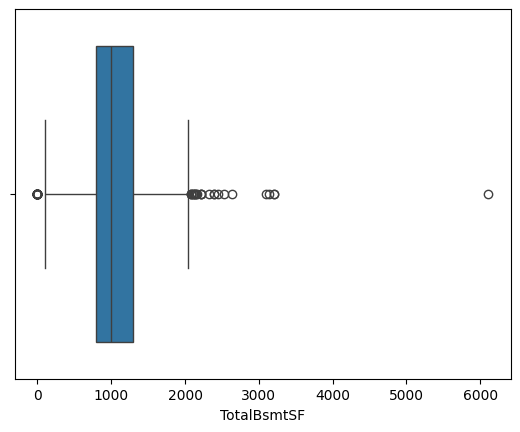

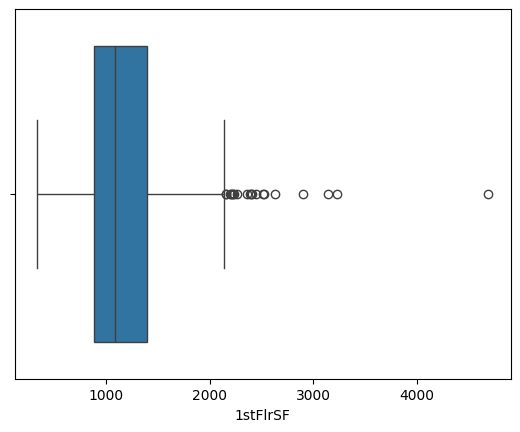

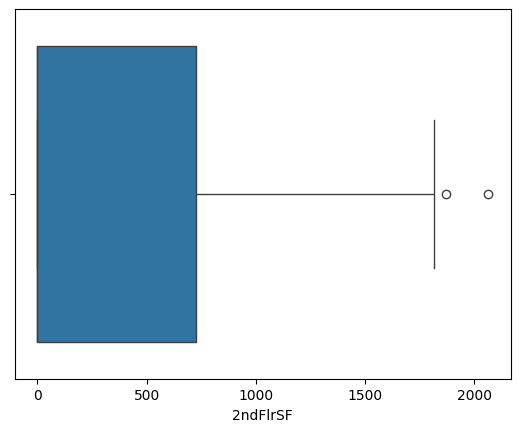

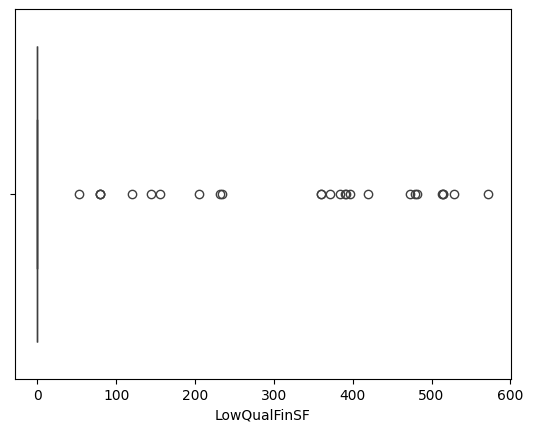

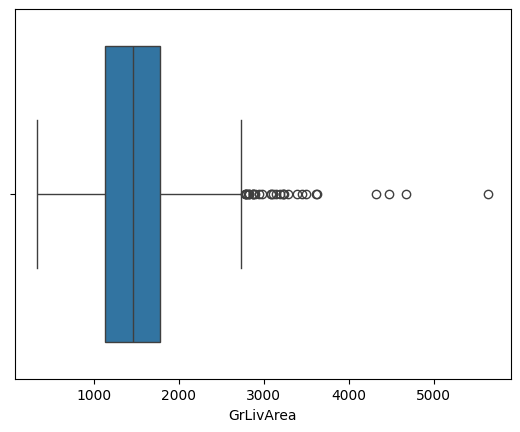

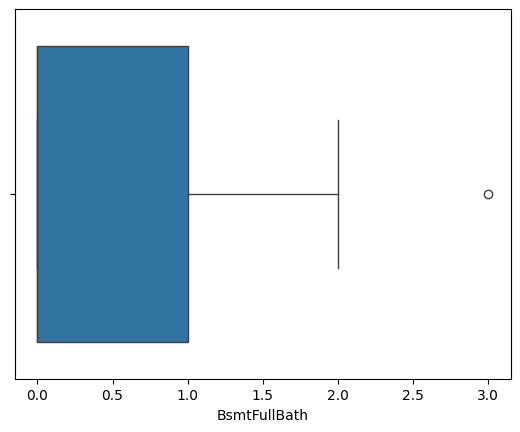

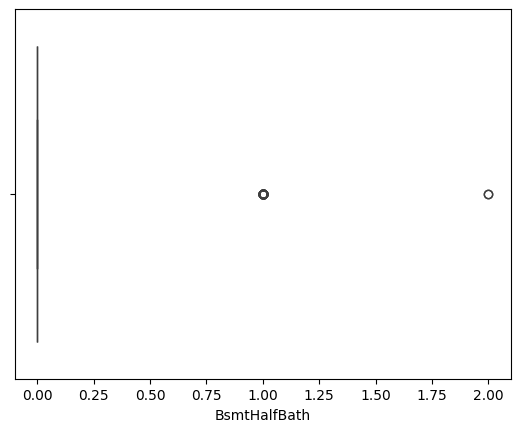

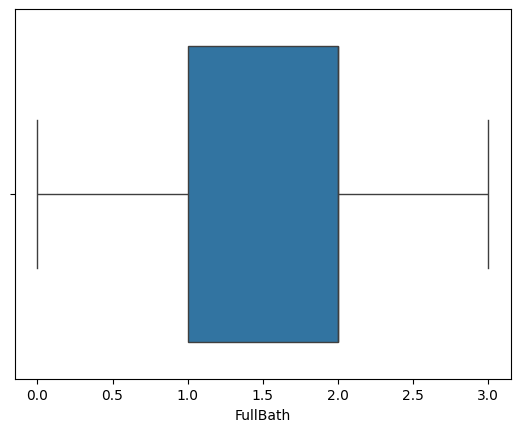

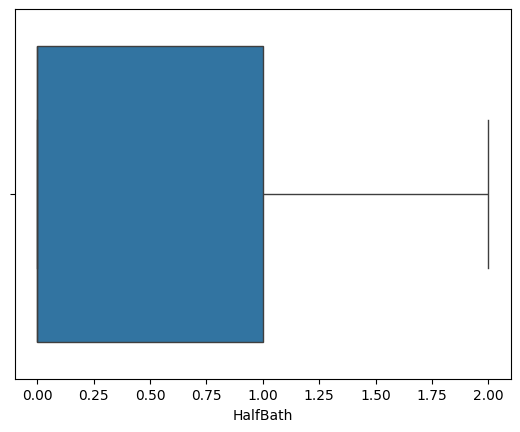

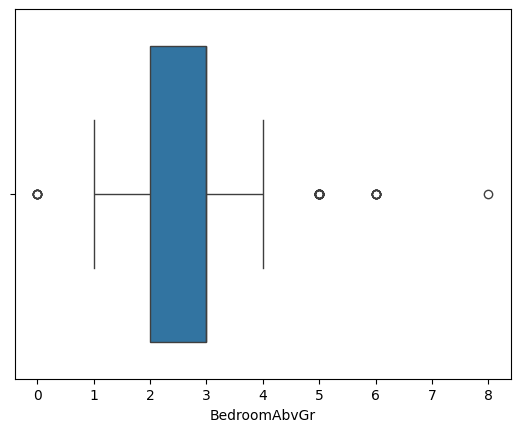

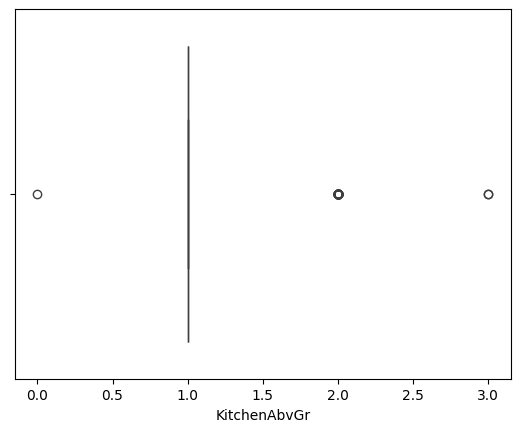

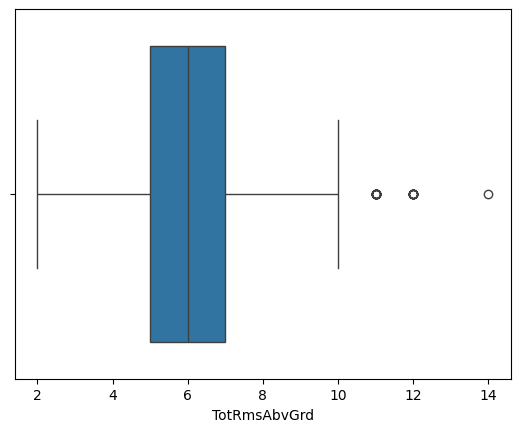

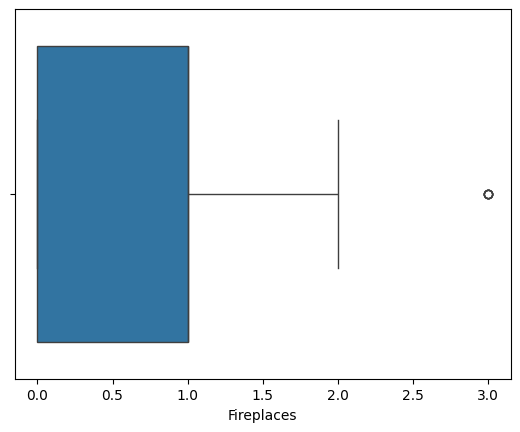

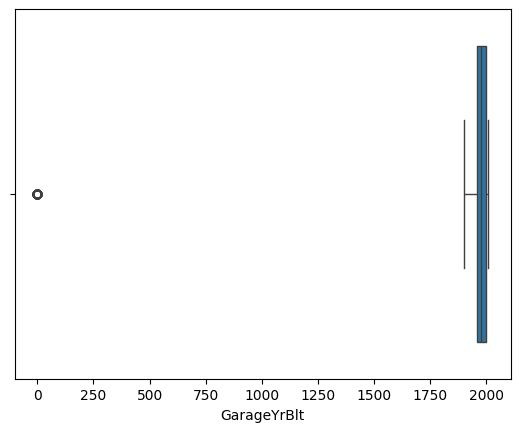

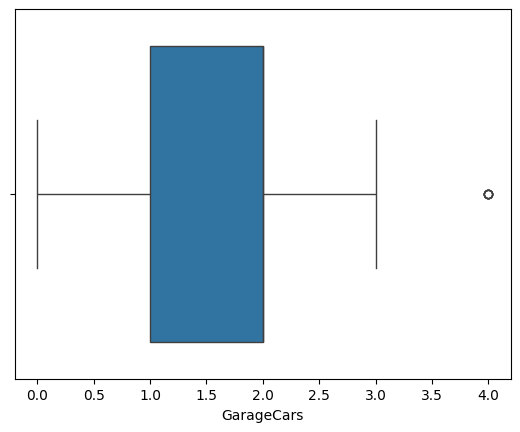

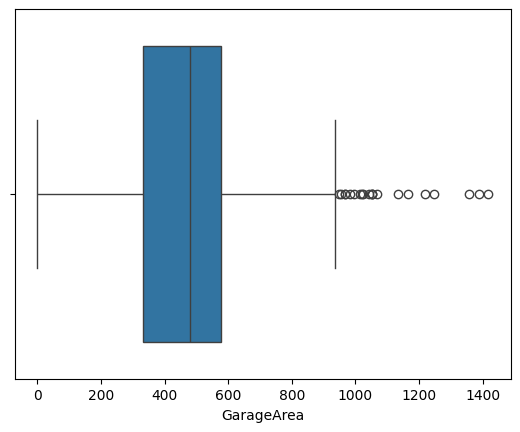

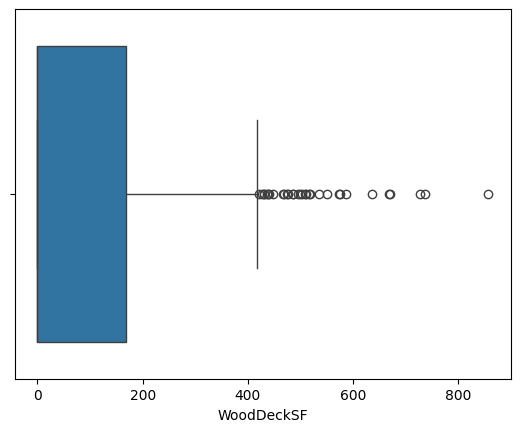

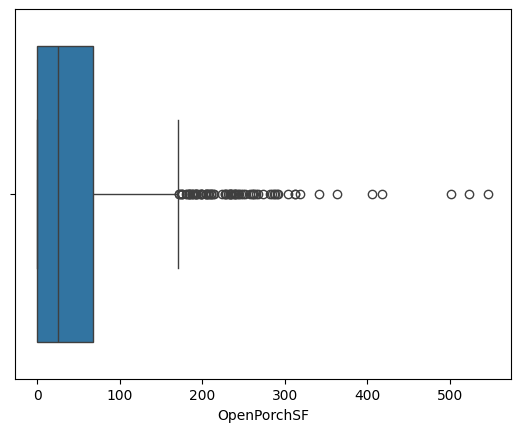

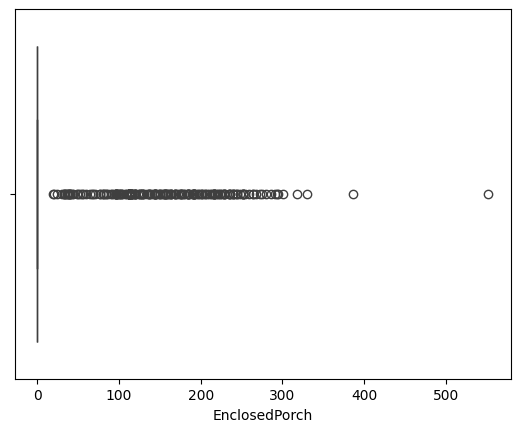

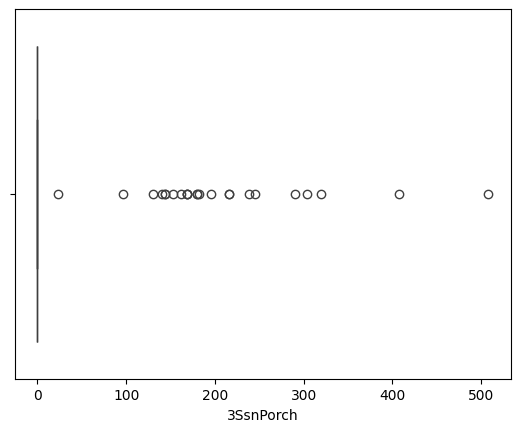

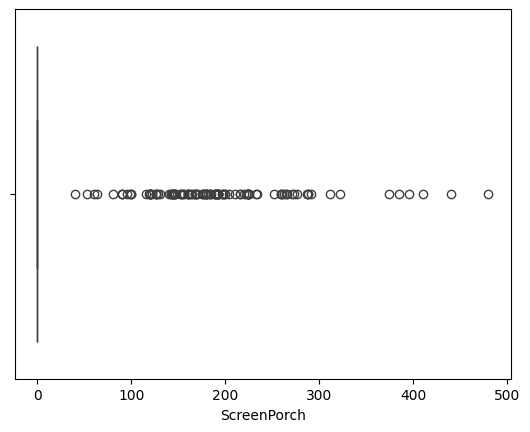

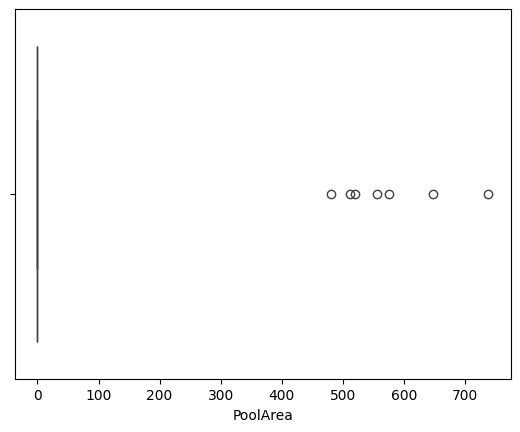

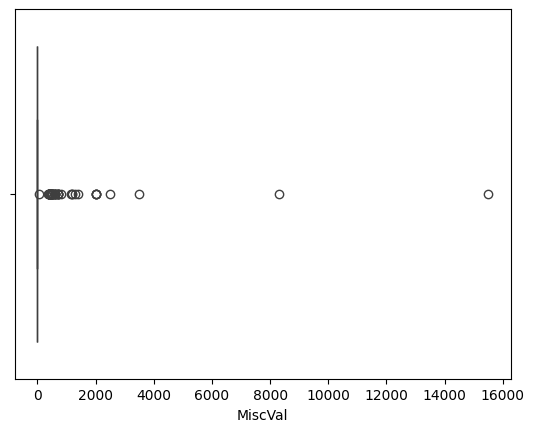

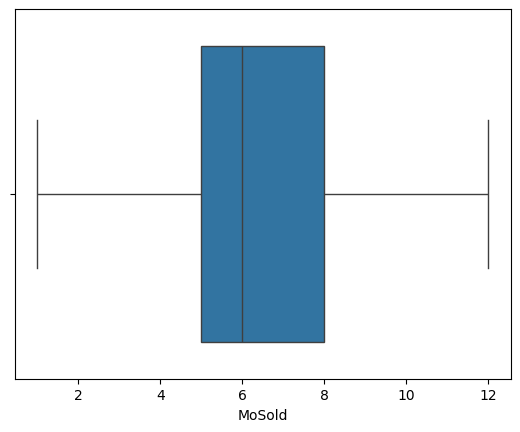

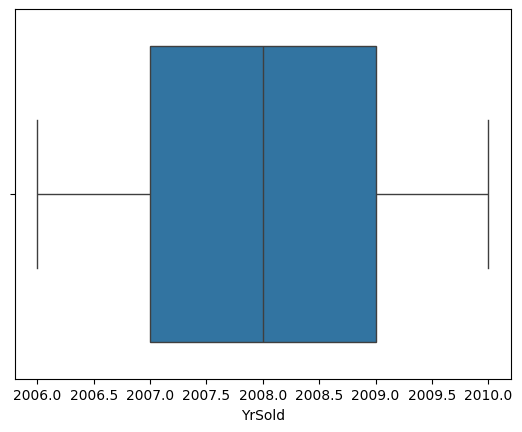

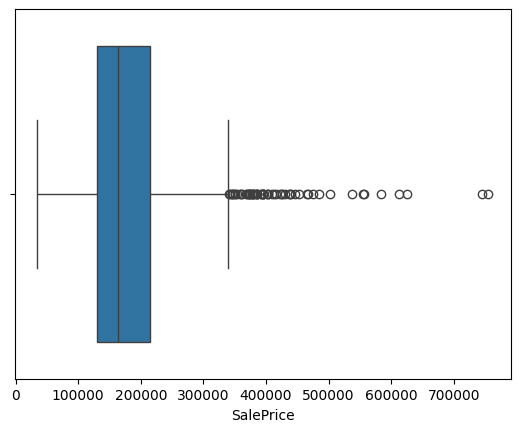

In [143]:
for i in df.select_dtypes(include= "number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

# Understanding Relationship between target and features

In [144]:
#scatter plot to understand the relationship

numeric_columns = df.select_dtypes(include = "number").columns.drop('SalePrice')
print(numeric_columns)
print(df.shape)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
(1459, 74)


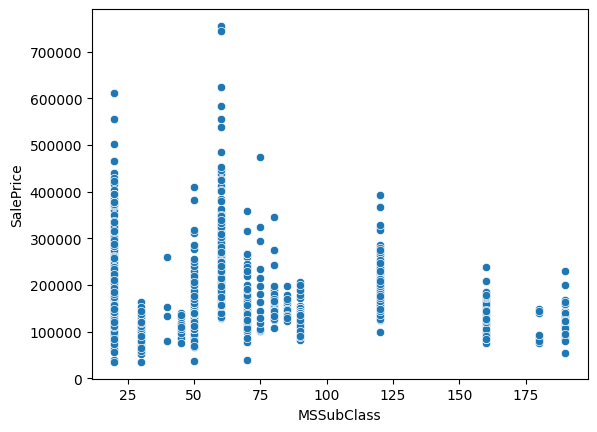

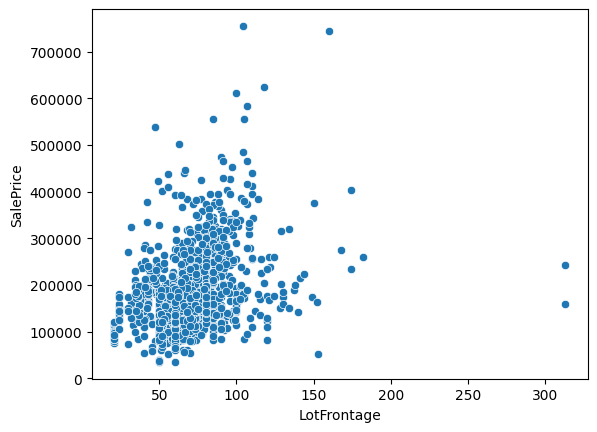

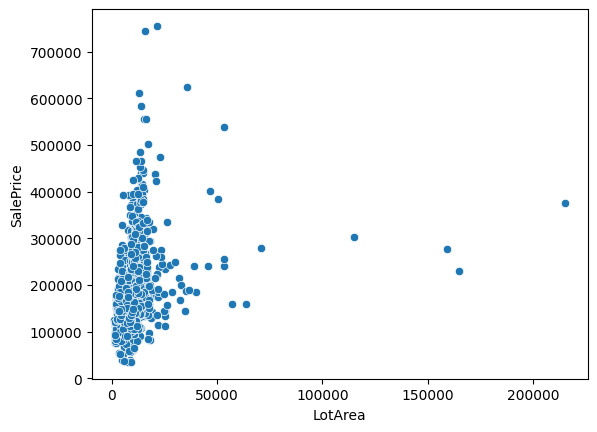

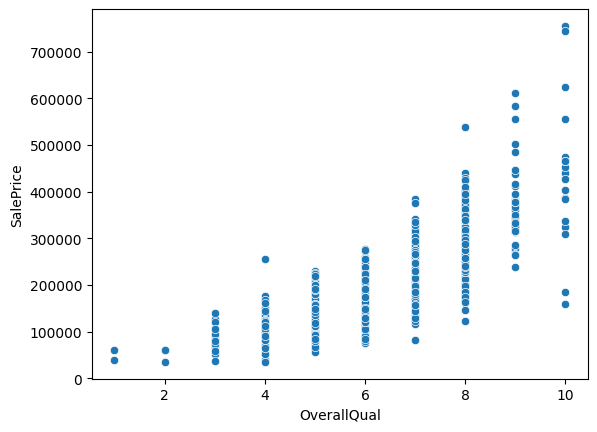

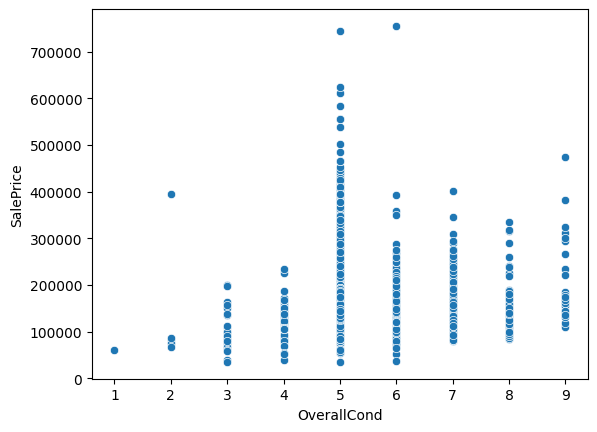

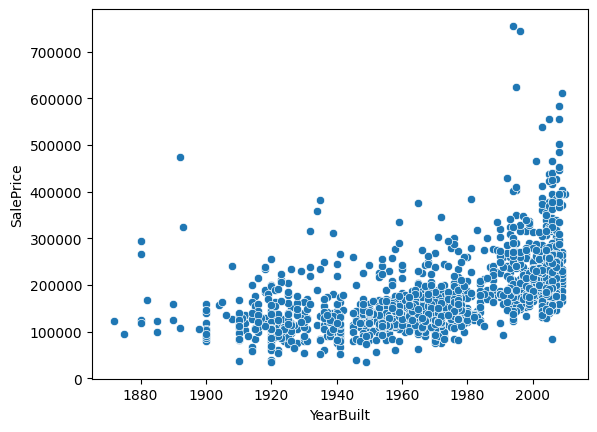

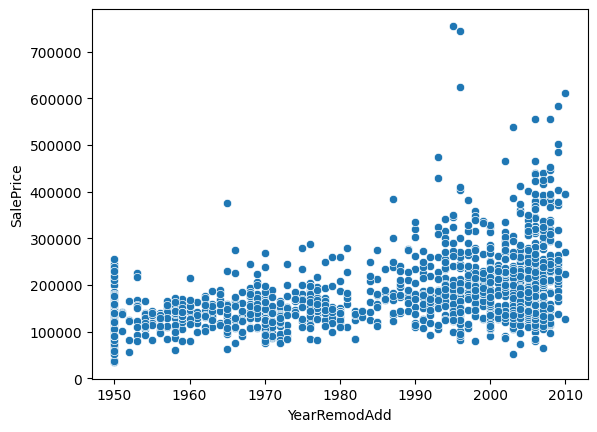

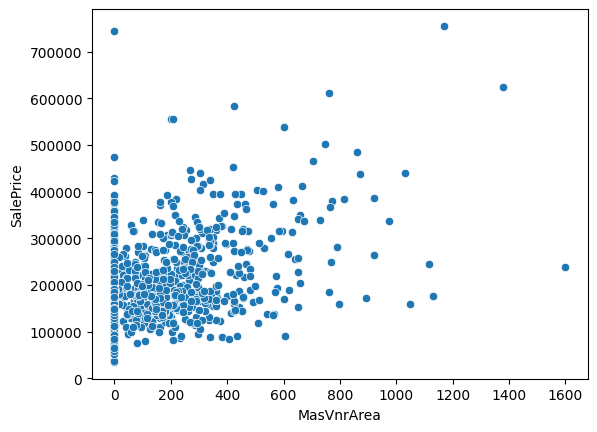

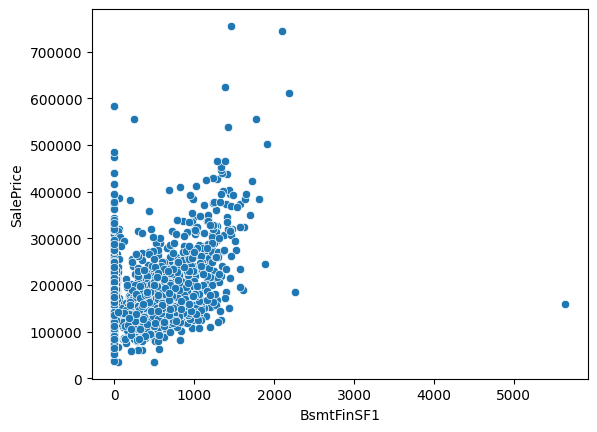

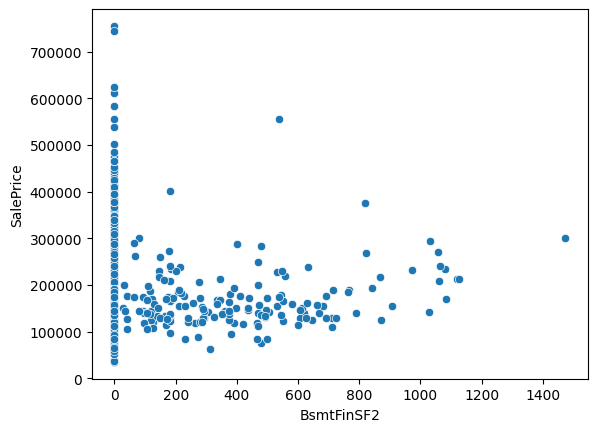

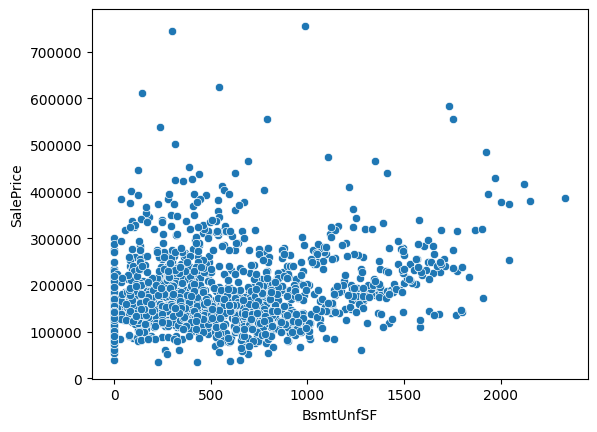

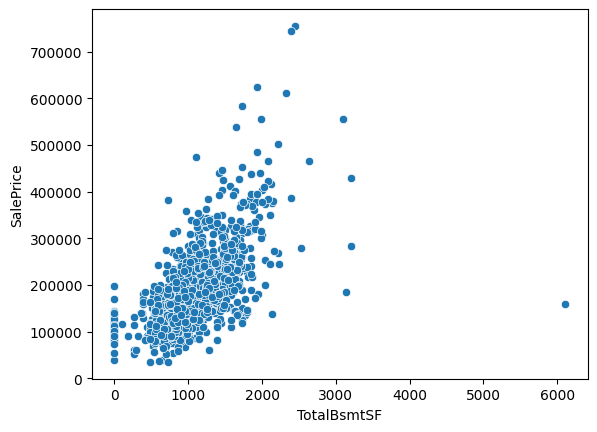

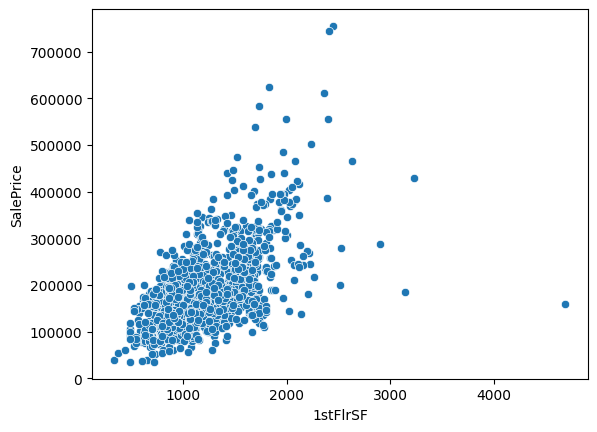

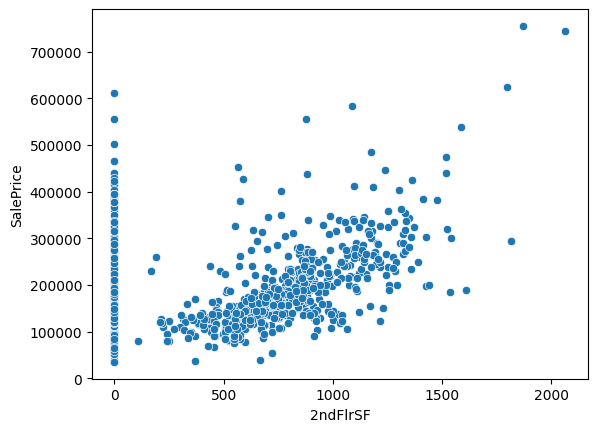

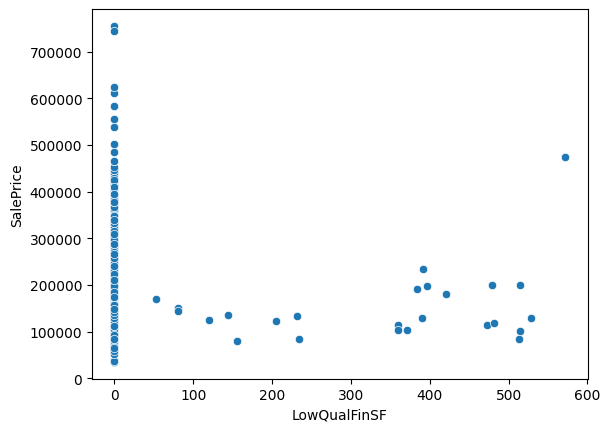

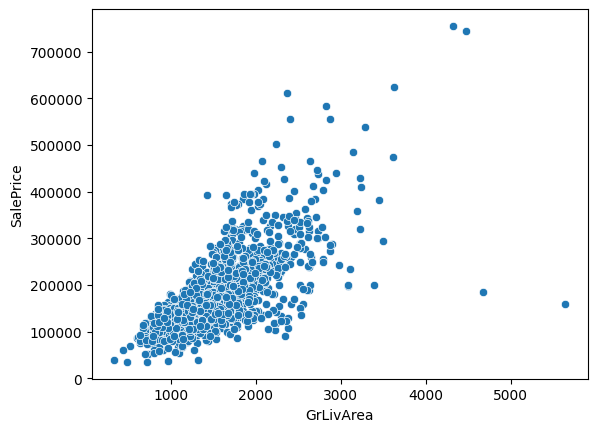

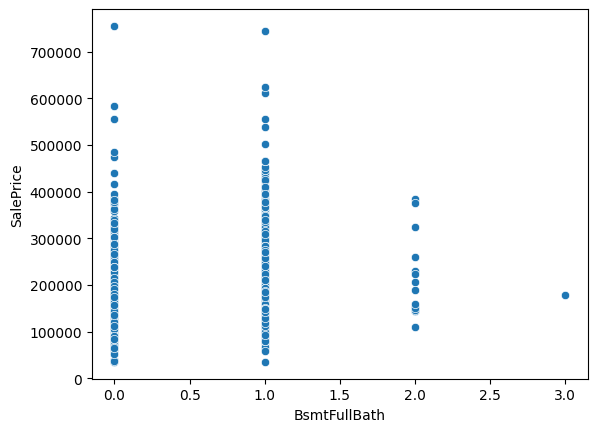

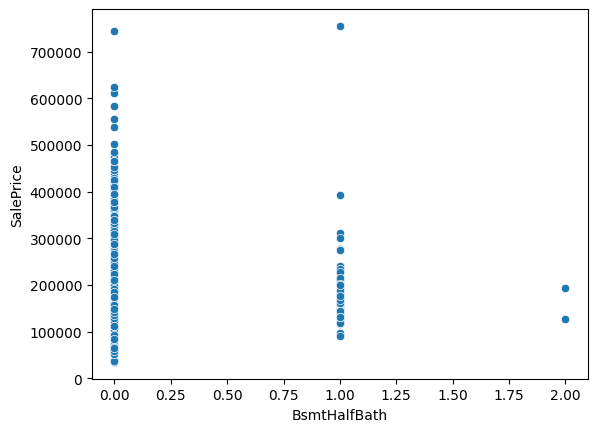

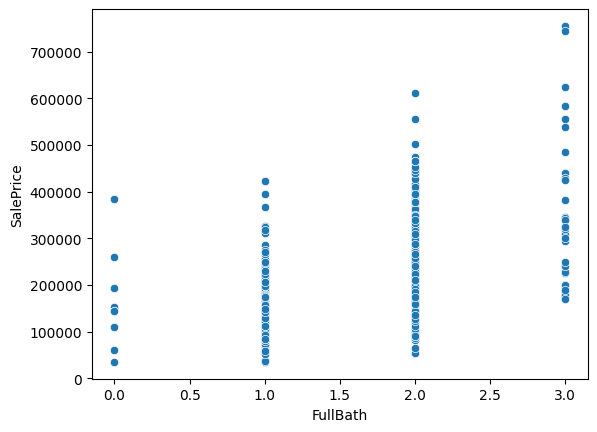

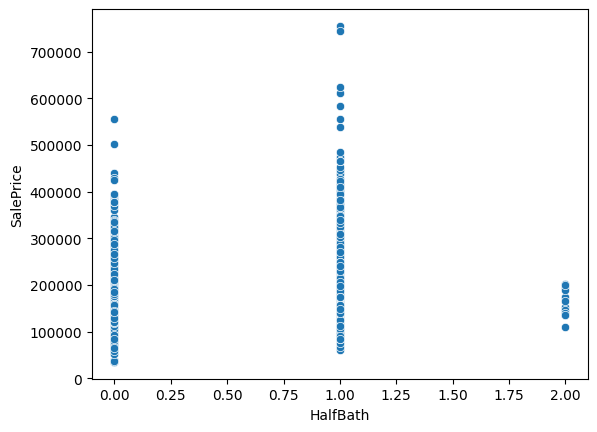

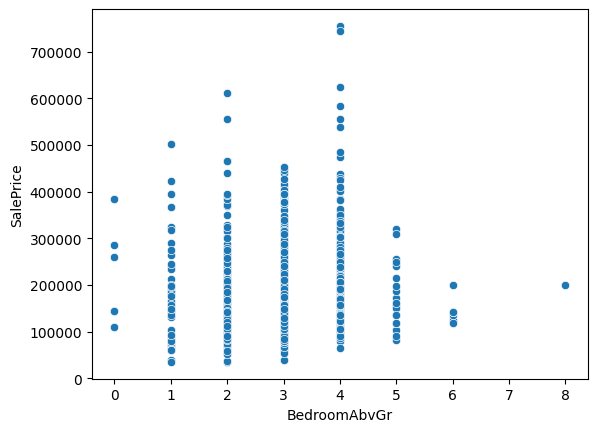

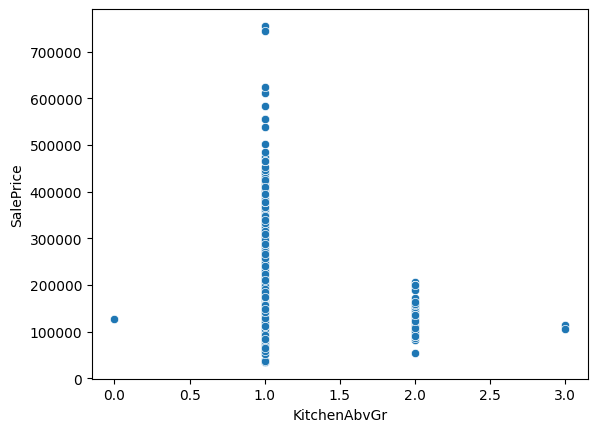

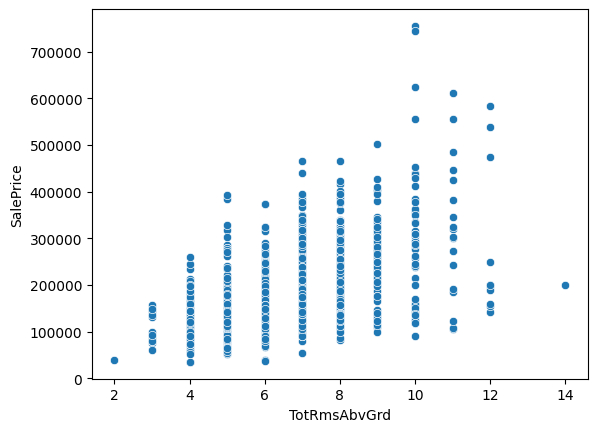

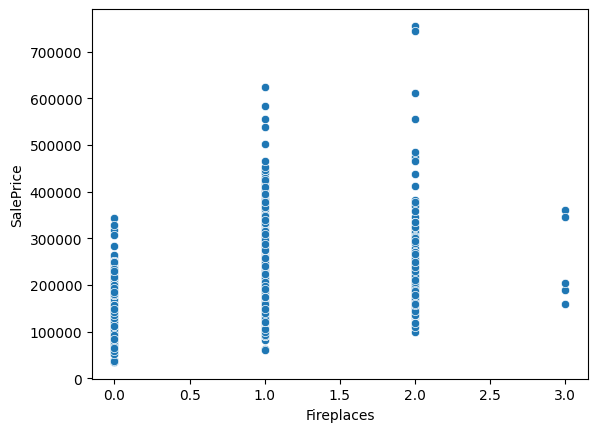

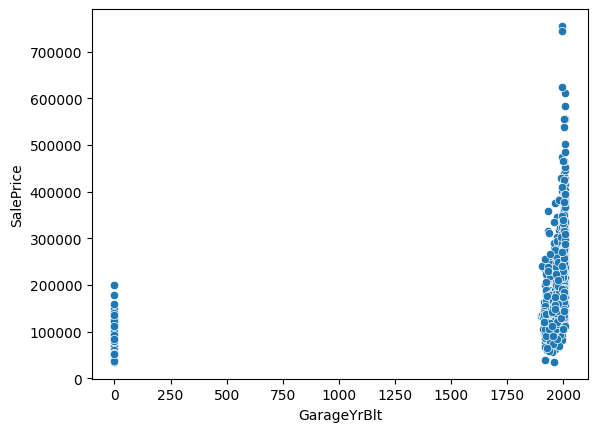

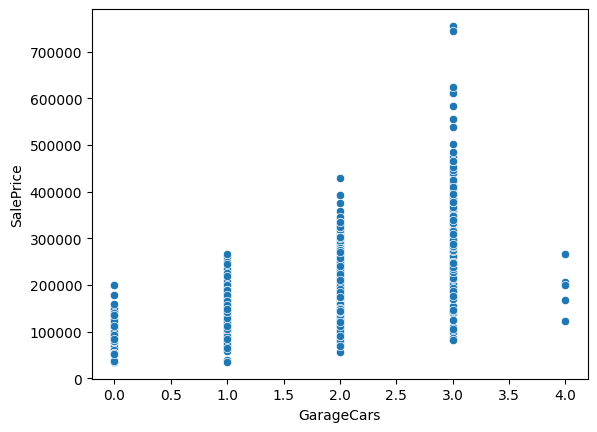

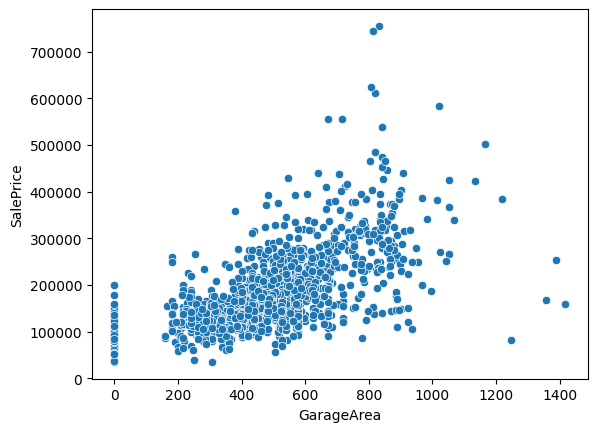

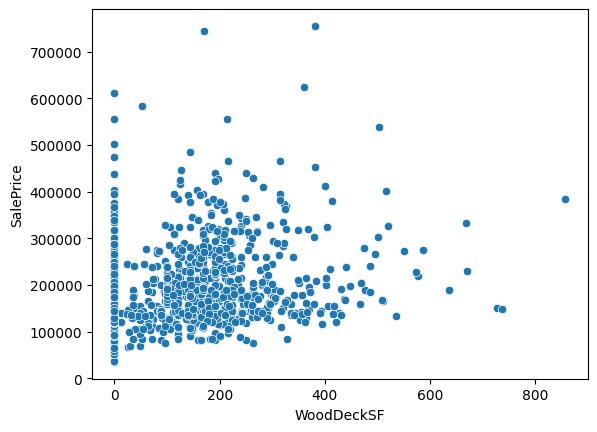

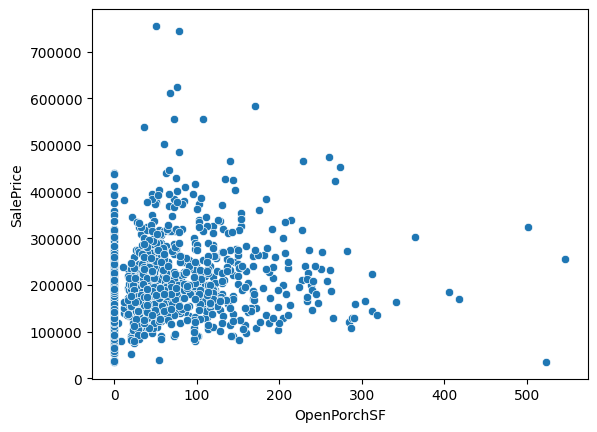

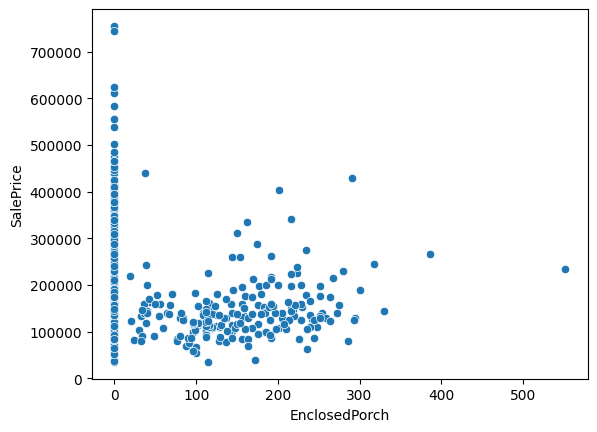

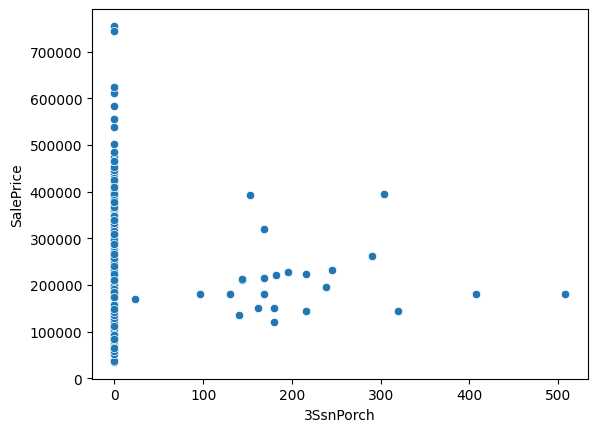

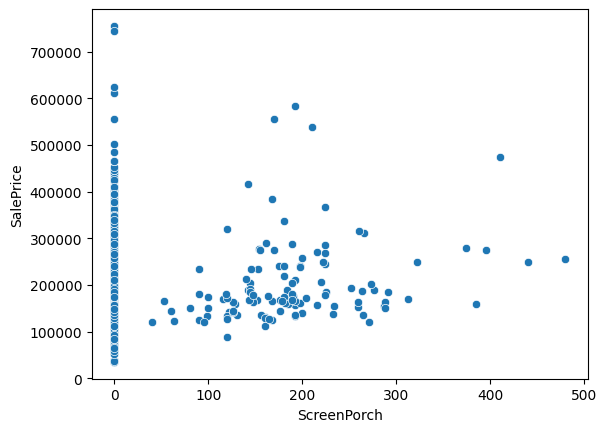

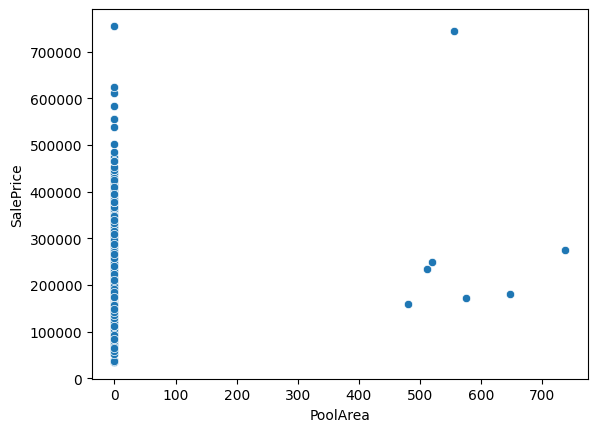

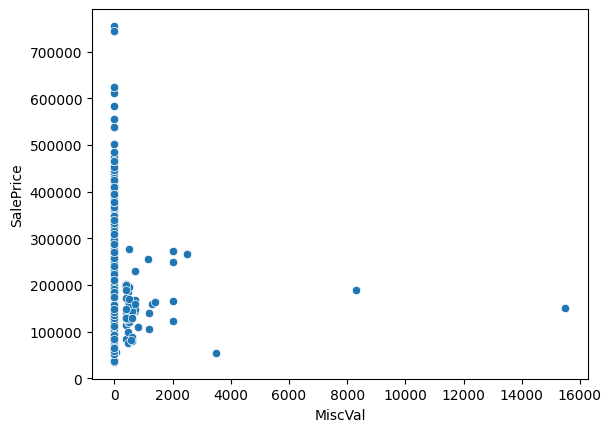

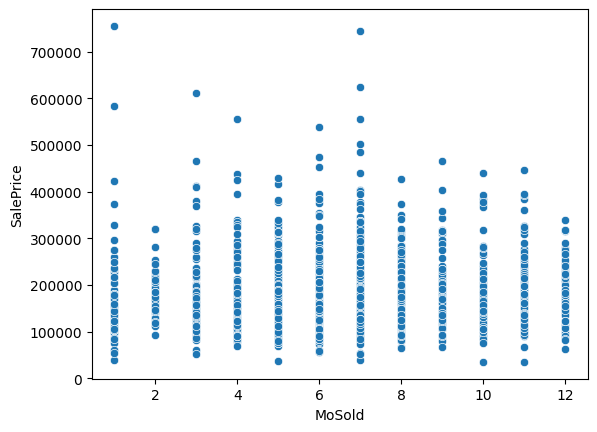

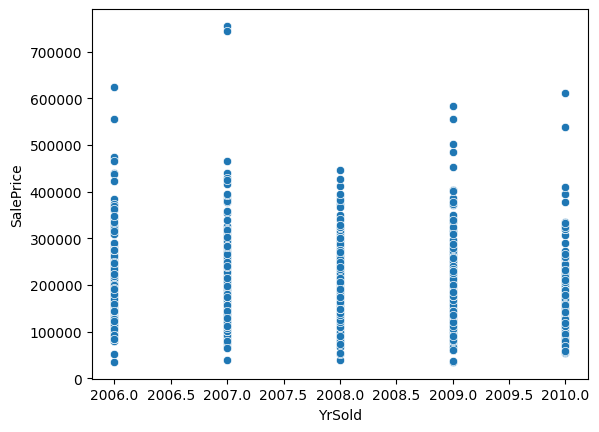

In [145]:
for i in numeric_columns:
  sns.scatterplot(data=df, x =i,y = 'SalePrice' )
  plt.show()

In [146]:
#correlation with heatmap to interpret the relation and multicolinearity
s = df.select_dtypes(include ="number").corr()
s

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.370454,-0.139766,0.032936,-0.059134,0.027435,0.040199,0.023156,-0.069501,-0.065549,-0.140627,-0.238160,-0.251484,0.307713,0.046524,0.074949,0.003799,-0.002243,0.131354,0.177004,-0.023502,0.281833,0.040274,-0.045232,-0.081122,-0.040232,-0.098558,-0.012598,-0.005838,-0.011904,-0.043786,-0.025932,0.008309,-0.007651,-0.013404,-0.021461,-0.084230
LotFrontage,-0.370454,1.000000,0.335967,0.239667,-0.043555,0.120956,0.084492,0.196898,0.232736,0.052264,0.119217,0.381480,0.434368,0.075641,0.031884,0.385219,0.107321,0.006641,0.186534,0.054113,0.245222,-0.005609,0.332606,0.249455,0.104843,0.281378,0.339130,0.088733,0.141819,0.008088,0.064665,0.041087,0.174574,0.005340,0.007413,0.004744,0.349895
LotArea,-0.139766,0.335967,1.000000,0.105786,-0.005665,0.014296,0.013852,0.104141,0.214121,0.111158,-0.002641,0.260962,0.299533,0.051030,0.004773,0.263109,0.158147,0.048034,0.126100,0.014333,0.119700,-0.017796,0.190037,0.271398,0.072618,0.154893,0.180392,0.171701,0.084751,-0.018360,0.020417,0.043147,0.077669,0.038063,0.001179,-0.014254,0.263837
OverallQual,0.032936,0.239667,0.105786,1.000000,-0.092243,0.573334,0.551605,0.411699,0.239265,-0.059291,0.308018,0.537523,0.475933,0.295969,-0.030502,0.593021,0.110700,-0.040291,0.551267,0.274328,0.101789,-0.184040,0.427720,0.396455,0.289236,0.600991,0.561980,0.239000,0.308554,-0.114162,0.030314,0.064755,0.065143,-0.031461,0.070570,-0.027277,0.791069
OverallCond,-0.059134,-0.043555,-0.005665,-0.092243,1.000000,-0.375780,0.074158,-0.128333,-0.046595,0.040132,-0.137008,-0.171796,-0.144646,0.029187,0.025454,-0.079777,-0.055250,0.117749,-0.193929,-0.060371,0.013039,-0.087085,-0.057485,-0.024167,-0.006408,-0.185670,-0.151662,-0.003318,-0.032847,0.070238,0.025465,0.054721,-0.002009,0.068752,-0.003685,0.044003,-0.077924
YearBuilt,0.027435,0.120956,0.014296,0.573334,-0.375780,1.000000,0.592512,0.316345,0.250465,-0.048903,0.149444,0.393159,0.283056,0.009784,-0.183774,0.199286,0.188374,-0.037990,0.467960,0.241923,-0.070813,-0.174715,0.095401,0.148580,0.271921,0.537866,0.479460,0.224946,0.189359,-0.387177,0.031461,-0.050175,0.005006,-0.034330,0.012791,-0.013733,0.523273
YearRemodAdd,0.040199,0.084492,0.013852,0.551605,0.074158,0.592512,1.000000,0.180136,0.129259,-0.067575,0.181520,0.292546,0.241344,0.139607,-0.062356,0.287677,0.120148,-0.012165,0.438733,0.182595,-0.040718,-0.149503,0.191603,0.113360,0.146195,0.420573,0.372012,0.205773,0.226944,-0.193740,0.045389,-0.038558,0.005882,-0.010226,0.021860,0.035656,0.507430
MasVnrArea,0.023156,0.196898,0.104141,0.411699,-0.128333,0.316345,0.180136,1.000000,0.264469,-0.072443,0.114298,0.363667,0.344255,0.174874,-0.069127,0.390818,0.085017,0.026581,0.277238,0.202058,0.102898,-0.037698,0.280839,0.248800,0.133906,0.364381,0.372990,0.159754,0.125461,-0.110363,0.018752,0.061367,0.011697,-0.029854,-0.006159,-0.008147,0.477486
BsmtFinSF1,-0.069501,0.232736,0.214121,0.239265,-0.046595,0.250465,0.129259,0.264469,1.000000,-0.050328,-0.495718,0.521963,0.445473,-0.136697,-0.064604,0.208088,0.649025,0.067281,0.059102,0.005085,-0.107281,-0.081175,0.044529,0.259541,0.116087,0.224342,0.296851,0.204403,0.111346,-0.102581,0.026382,0.061862,0.140491,0.003514,-0.016060,0.014456,0.386436
BsmtFinSF2,-0.065549,0.052264,0.111158,-0.059291,0.040132,-0.048903,-0.067575,-0.072443,-0.050328,1.000000,-0.209395,0.104593,0.096948,-0.099146,0.014784,-0.009686,0.158557,0.070904,-0.076306,-0.031922,-0.015696,-0.040795,-0.035170,0.046748,0.035132,-0.038204,-0.018295,0.067909,0.002954,0.036475,-0.030017,0.088823,0.041697,0.004923,-0.015309,0.031734,-0.011412


<Axes: >

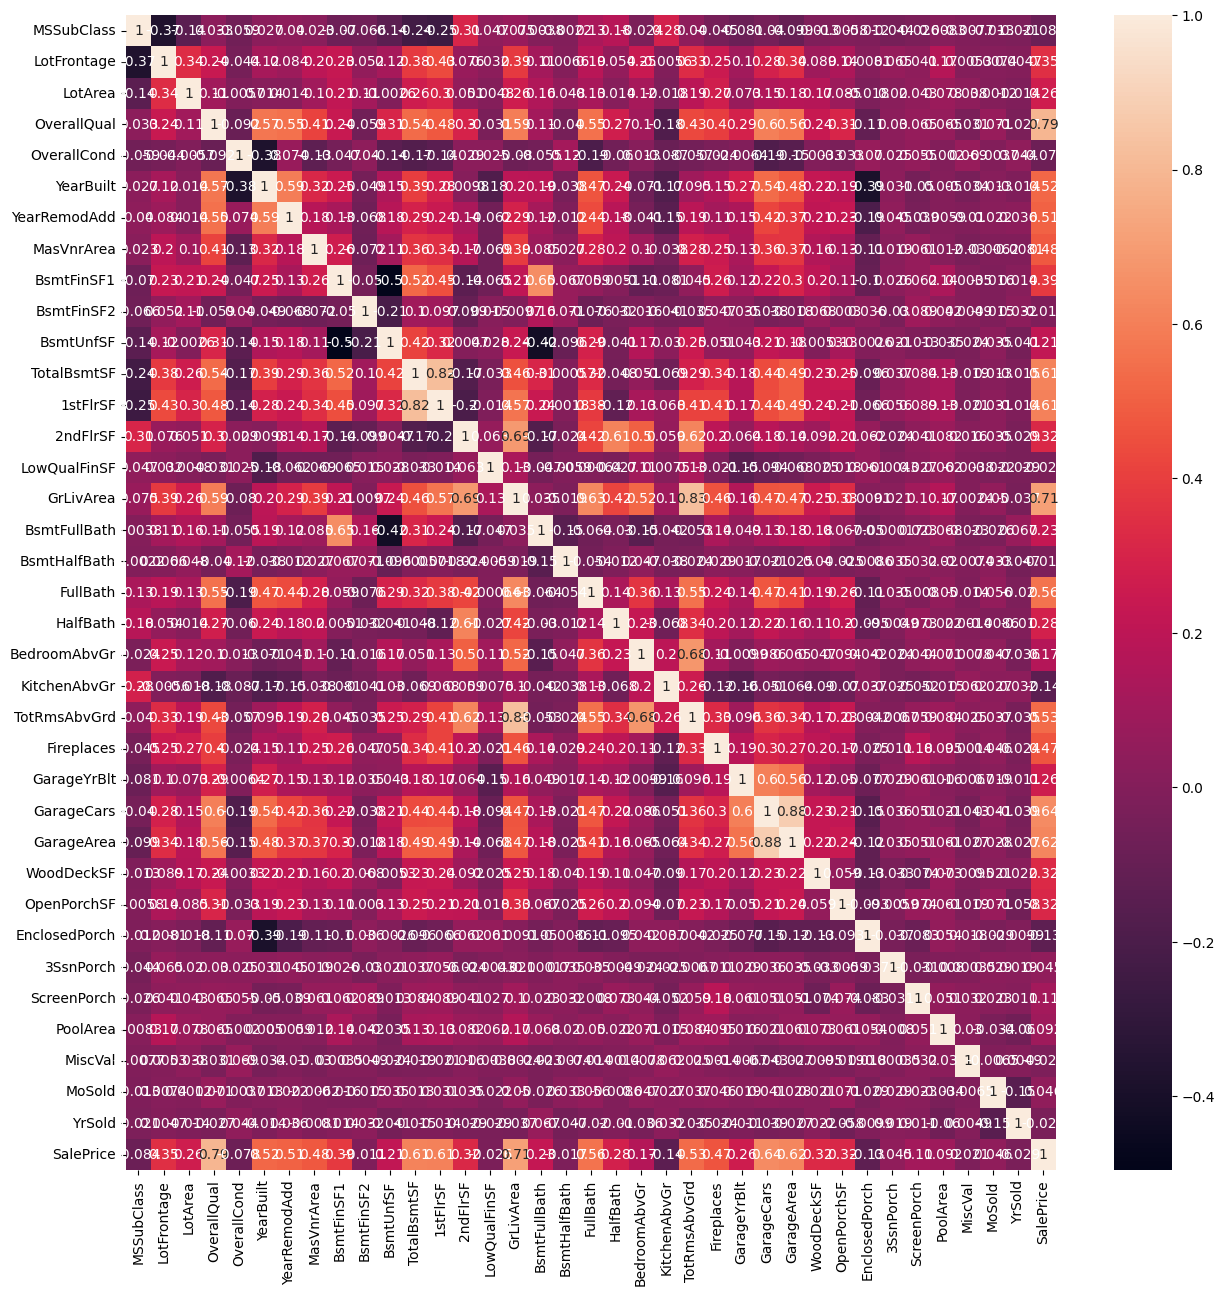

In [147]:
plt.figure(figsize=(15,15))
sns.heatmap(s,annot = True)

#Feature Selection

In [148]:
#checking for numerical features
numerical_features = df.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()

# Get correlation of all features with SalePrice
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Display top correlated features
print(correlation_with_target)

SalePrice        1.000000
OverallQual      0.791069
GrLivArea        0.708618
GarageCars       0.640473
GarageArea       0.623423
TotalBsmtSF      0.613905
1stFlrSF         0.605968
FullBath         0.560881
TotRmsAbvGrd     0.533779
YearBuilt        0.523273
YearRemodAdd     0.507430
MasVnrArea       0.477486
Fireplaces       0.466968
BsmtFinSF1       0.386436
LotFrontage      0.349895
WoodDeckSF       0.324422
2ndFlrSF         0.319464
OpenPorchSF      0.315831
HalfBath         0.284400
LotArea          0.263837
GarageYrBlt      0.261413
BsmtFullBath     0.227082
BsmtUnfSF        0.214446
BedroomAbvGr     0.168235
ScreenPorch      0.111419
PoolArea         0.092397
MoSold           0.046380
3SsnPorch        0.044571
BsmtFinSF2      -0.011412
BsmtHalfBath    -0.016873
MiscVal         -0.021200
LowQualFinSF    -0.025620
YrSold          -0.028907
OverallCond     -0.077924
MSSubClass      -0.084230
EnclosedPorch   -0.128627
KitchenAbvGr    -0.135935
Name: SalePrice, dtype: float64


In [149]:
# Define columns to drop
drop_columns = [
    'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea',
    'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal',
    'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr'
]

# Drop the columns
df = df.drop(columns=drop_columns)

# Check new dataset shape
print("New dataset shape:", df.shape)

New dataset shape: (1459, 58)


In [150]:
df.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,856,GasA,Ex,Y,SBrkr,856,854,1710,2,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,WD,Normal,208500
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,1262,GasA,Ex,Y,SBrkr,1262,0,1262,2,0,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,WD,Normal,181500
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,920,GasA,Ex,Y,SBrkr,920,866,1786,2,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,WD,Normal,223500
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,756,GasA,Gd,Y,SBrkr,961,756,1717,1,0,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,WD,Abnorml,140000
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,2,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,WD,Normal,250000


In [151]:
# Select categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Count unique values for each categorical feature
for feature in categorical_features:
    print(f"{feature}: {df[feature].nunique()} unique values")

MSZoning: 5 unique values
Street: 2 unique values
LotShape: 4 unique values
LandContour: 4 unique values
Utilities: 2 unique values
LotConfig: 5 unique values
LandSlope: 3 unique values
Neighborhood: 25 unique values
Condition1: 9 unique values
Condition2: 8 unique values
BldgType: 5 unique values
HouseStyle: 8 unique values
RoofStyle: 6 unique values
RoofMatl: 8 unique values
Exterior1st: 15 unique values
Exterior2nd: 16 unique values
ExterQual: 4 unique values
ExterCond: 5 unique values
Foundation: 6 unique values
BsmtQual: 5 unique values
BsmtCond: 5 unique values
BsmtExposure: 5 unique values
BsmtFinType1: 7 unique values
BsmtFinType2: 7 unique values
Heating: 6 unique values
HeatingQC: 5 unique values
CentralAir: 2 unique values
Electrical: 5 unique values
KitchenQual: 4 unique values
Functional: 7 unique values
GarageType: 7 unique values
GarageFinish: 4 unique values
GarageQual: 6 unique values
GarageCond: 6 unique values
PavedDrive: 3 unique values
SaleType: 9 unique values
Sal

In [152]:
# Select only categorical columns
categorical_features = df.select_dtypes(include=['object']).columns

# Iterate over each categorical feature and print the count of each unique value
for column in categorical_features:
    print(f"Feature: {column}")
    print(df[column].value_counts())  # Count occurrences of each unique value
    print("-" * 40)

Feature: MSZoning
MSZoning
RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
----------------------------------------
Feature: Street
Street
Pave    1453
Grvl       6
Name: count, dtype: int64
----------------------------------------
Feature: LotShape
LotShape
Reg    924
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
----------------------------------------
Feature: LandContour
LandContour
Lvl    1310
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
----------------------------------------
Feature: Utilities
Utilities
AllPub    1458
NoSeWa       1
Name: count, dtype: int64
----------------------------------------
Feature: LotConfig
LotConfig
Inside     1051
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
----------------------------------------
Feature: LandSlope
LandSlope
Gtl    1381
Mod      65
Sev      13
Name: count, dtype: int64
-------------------------------

In [153]:
#dropping features with low variance
drop_columns = ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'ExterCond',
                'BsmtFinType2', 'Heating', 'GarageQual', 'GarageCond']
df = df.drop(columns=drop_columns)

print("New dataset shape:", df.shape)

New dataset shape: (1459, 49)


In [154]:
df.head()

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,2003,2003,Gable,VinylSd,VinylSd,196.0,Gd,PConc,Gd,TA,No,GLQ,706,856,Ex,Y,SBrkr,856,854,1710,2,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,Y,0,61,WD,Normal,208500
1,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,1976,1976,Gable,MetalSd,MetalSd,0.0,TA,CBlock,Gd,TA,Gd,ALQ,978,1262,Ex,Y,SBrkr,1262,0,1262,2,0,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,Y,298,0,WD,Normal,181500
2,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,2001,2002,Gable,VinylSd,VinylSd,162.0,Gd,PConc,Gd,TA,Mn,GLQ,486,920,Ex,Y,SBrkr,920,866,1786,2,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,Y,0,42,WD,Normal,223500
3,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,1915,1970,Gable,Wd Sdng,Wd Shng,0.0,TA,BrkTil,TA,Gd,No,ALQ,216,756,Gd,Y,SBrkr,961,756,1717,1,0,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,Y,0,35,WD,Abnorml,140000
4,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,2000,2000,Gable,VinylSd,VinylSd,350.0,Gd,PConc,Gd,TA,Av,GLQ,655,1145,Ex,Y,SBrkr,1145,1053,2198,2,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,Y,192,84,WD,Normal,250000


In [166]:
#grouping data

# Group rare values in RoofStyle
df['RoofStyle'] = df['RoofStyle'].replace(['Flat', 'Gambrel', 'Mansard', 'Shed'], 'Other')

# Group rare values in Electrical
df['Electrical'] = df['Electrical'].replace(['FuseP', 'Mix'], 'Other')

# Group rare values in Functional
df['Functional'] = df['Functional'].replace(['Min2', 'Min1', 'Mod', 'Maj1', 'Maj2', 'Sev'], 'Other')
print(df['Functional'].value_counts())

# Group rare categories in Foundation
df['Foundation'] = df['Foundation'].replace(['Slab', 'Stone', 'Wood'], 'Other')
print(df['Foundation'].value_counts())

#Merged LandSlope into "Gtl" and "Steep"
df['LandSlope'] = df['LandSlope'].replace({'Mod': 'Steep', 'Sev': 'Steep'})
print(df['LandSlope'].value_counts())

# Merge rare categories in Exterior1st
df['Exterior1st'] = df['Exterior1st'].replace(['AsbShng', 'BrkComm', 'CBlock', 'Stone', 'ImStucc', 'AsphShn', 'PreCast'], 'Other')

# Merge rare categories in Exterior2nd
df['Exterior2nd'] = df['Exterior2nd'].replace(['AsbShng', 'Brk Cmn', 'CBlock', 'Stone', 'ImStucc', 'AsphShn', 'Other'], 'Other')

print(df['Exterior1st'].value_counts())
print(df['Exterior2nd'].value_counts())

#Merged "Po" and "Fa" into "Bad"
df['BsmtCond'] = df['BsmtCond'].replace({'Po': 'Bad', 'Fa': 'Bad'})
print(df['BsmtCond'].value_counts())

Functional
Typ      1359
Other     100
Name: count, dtype: int64
Foundation
PConc     646
CBlock    634
BrkTil    146
Other      33
Name: count, dtype: int64
LandSlope
Gtl      1381
Steep      78
Name: count, dtype: int64
Exterior1st
VinylSd    514
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
Other       27
WdShing     26
Stucco      25
Name: count, dtype: int64
Exterior2nd
VinylSd    503
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Other       47
Wd Shng     38
Stucco      26
BrkFace     25
Name: count, dtype: int64
BsmtCond
TA     1310
Gd       65
Bad      47
NA       37
Name: count, dtype: int64


In [167]:
df.head()

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,2003,2003,Gable,VinylSd,VinylSd,196.0,Gd,PConc,Gd,TA,No,GLQ,706,856,Ex,Y,SBrkr,856,854,1710,2,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,Y,0,61,WD,Normal,208500
1,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,1976,1976,Gable,MetalSd,MetalSd,0.0,TA,CBlock,Gd,TA,Gd,ALQ,978,1262,Ex,Y,SBrkr,1262,0,1262,2,0,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,Y,298,0,WD,Normal,181500
2,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,2001,2002,Gable,VinylSd,VinylSd,162.0,Gd,PConc,Gd,TA,Mn,GLQ,486,920,Ex,Y,SBrkr,920,866,1786,2,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,Y,0,42,WD,Normal,223500
3,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,1915,1970,Gable,Wd Sdng,Wd Shng,0.0,TA,BrkTil,TA,Gd,No,ALQ,216,756,Gd,Y,SBrkr,961,756,1717,1,0,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,Y,0,35,WD,Abnorml,140000
4,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,2000,2000,Gable,VinylSd,VinylSd,350.0,Gd,PConc,Gd,TA,Av,GLQ,655,1145,Ex,Y,SBrkr,1145,1053,2198,2,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,Y,192,84,WD,Normal,250000
